# 1. Import of libraries

In [1]:
# System libraries
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Library machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from xgboost import XGBClassifier

# 2. Load Dataset

In [2]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Loading dataset
train_df = pd.read_csv("dataset.csv")

In [3]:
# Viewing first 5 data
train_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
# Viewing 5 latest data
train_df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [5]:
# Type dados
train_df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [6]:
# Info data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

# 3. Exploratory Data Analysis (EDA)

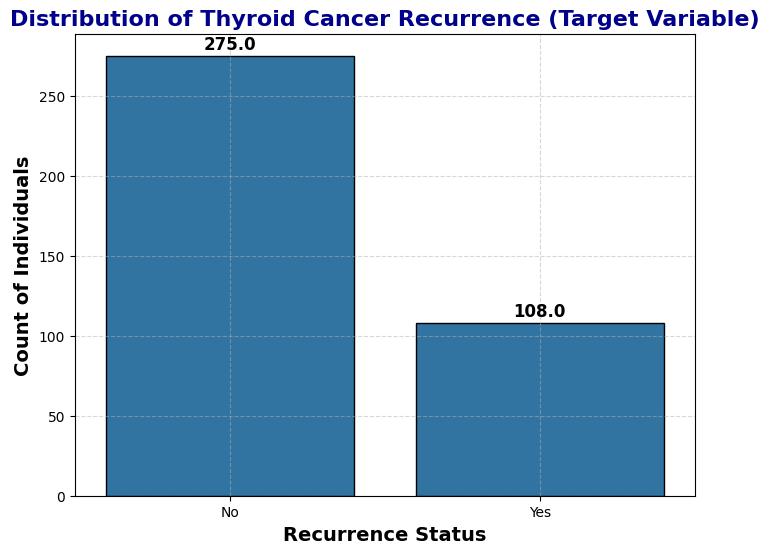

In [7]:
plt.figure(figsize=(8, 6))

# Create the countplot without passing palette to avoid the warning
sns.countplot(data=train_df, x="Recurred", edgecolor='black')

# Set title and labels 
plt.title("Distribution of Thyroid Cancer Recurrence (Target Variable)", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Recurrence Status", fontsize=14, fontweight='bold')
plt.ylabel("Count of Individuals", fontsize=14, fontweight='bold')

# Add value annotations on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', fontweight='bold', 
                       xytext=(0, 8), textcoords='offset points')

# Add a subtle grid for better interpretation
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

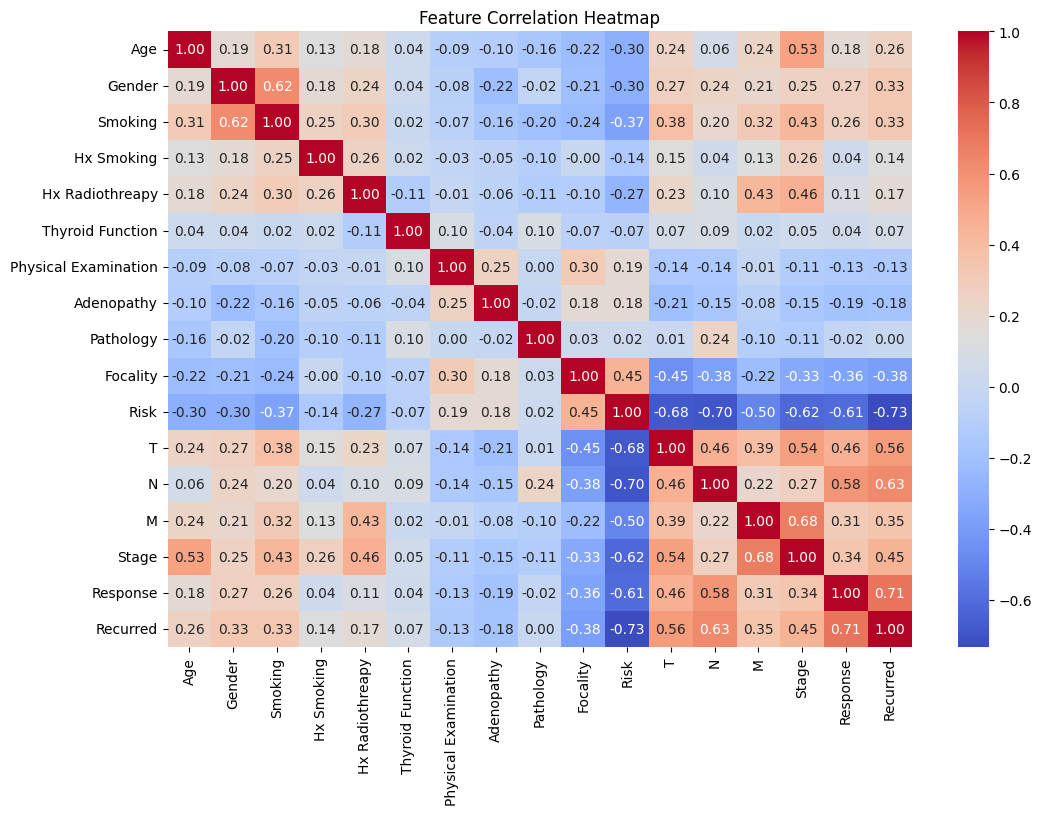

In [8]:
# Convert categorical columns to numeric using label encoding
train_df_encoded = train_df.copy()
for col in train_df_encoded.select_dtypes(include=['object']).columns:
    train_df_encoded[col] = train_df_encoded[col].astype('category').cat.codes

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

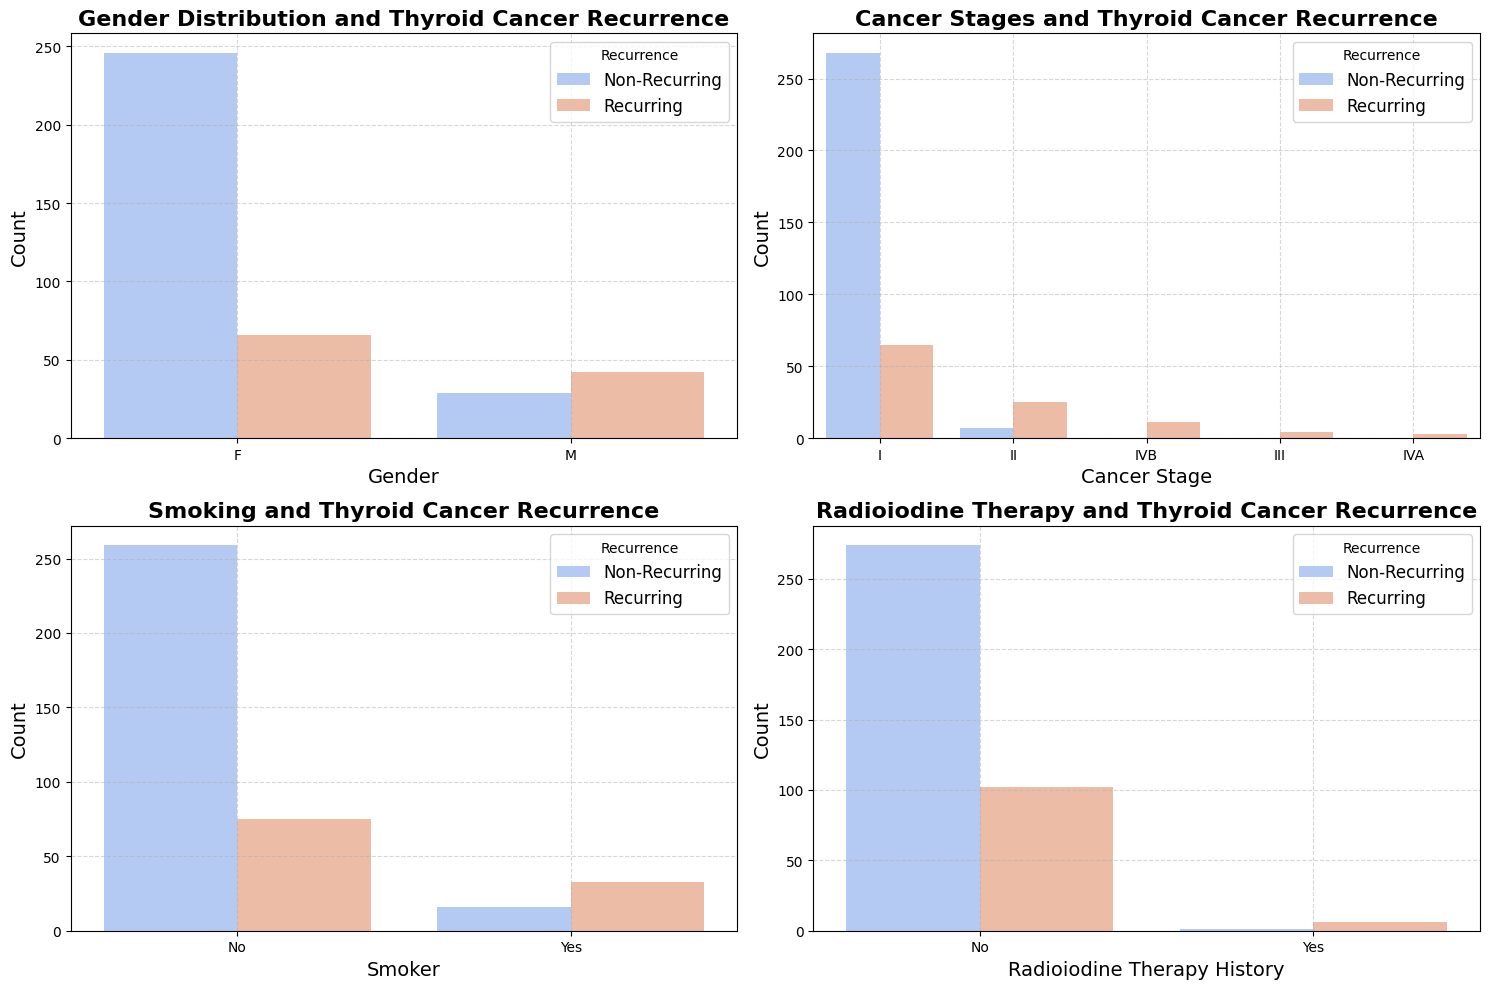

In [9]:
# Creating charts for each indicator
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Common style
palette = 'coolwarm'
legend_labels = ['Non-Recurring', 'Recurring']

# Gender distribution by thyroid cancer recurrence
sns.countplot(x='Gender', hue='Recurred', data=train_df, ax=axs[0, 0], palette=palette)
axs[0, 0].set_title('Gender Distribution and Thyroid Cancer Recurrence', fontsize=16, fontweight='bold')
axs[0, 0].set_xlabel('Gender', fontsize=14)
axs[0, 0].set_ylabel('Count', fontsize=14)
axs[0, 0].legend(title='Recurrence', labels=legend_labels, loc='upper right', fontsize=12)

# Distribution of cancer stages by thyroid cancer recurrence
sns.countplot(x='Stage', hue='Recurred', data=train_df, ax=axs[0, 1], palette=palette)
axs[0, 1].set_title('Cancer Stages and Thyroid Cancer Recurrence', fontsize=16, fontweight='bold')
axs[0, 1].set_xlabel('Cancer Stage', fontsize=14)
axs[0, 1].set_ylabel('Count', fontsize=14)
axs[0, 1].legend(title='Recurrence', labels=legend_labels, loc='upper right', fontsize=12)

# Distribution of smokers by thyroid cancer recurrence
sns.countplot(x='Smoking', hue='Recurred', data=train_df, ax=axs[1, 0], palette=palette)
axs[1, 0].set_title('Smoking and Thyroid Cancer Recurrence', fontsize=16, fontweight='bold')
axs[1, 0].set_xlabel('Smoker', fontsize=14)
axs[1, 0].set_ylabel('Count', fontsize=14)
axs[1, 0].legend(title='Recurrence', labels=legend_labels, loc='upper right', fontsize=12)

# Distribution of radioiodine therapy history for thyroid cancer recurrence
sns.countplot(x='Hx Radiothreapy', hue='Recurred', data=train_df, ax=axs[1, 1], palette=palette)
axs[1, 1].set_title('Radioiodine Therapy and Thyroid Cancer Recurrence', fontsize=16, fontweight='bold')
axs[1, 1].set_xlabel('Radioiodine Therapy History', fontsize=14)
axs[1, 1].set_ylabel('Count', fontsize=14)
axs[1, 1].legend(title='Recurrence', labels=legend_labels, loc='upper right', fontsize=12)

# Add grid for all subplots
for ax in axs.flat:
    ax.grid(True, linestyle='--', alpha=0.5)

# Layout adjustment
plt.tight_layout()
plt.show()

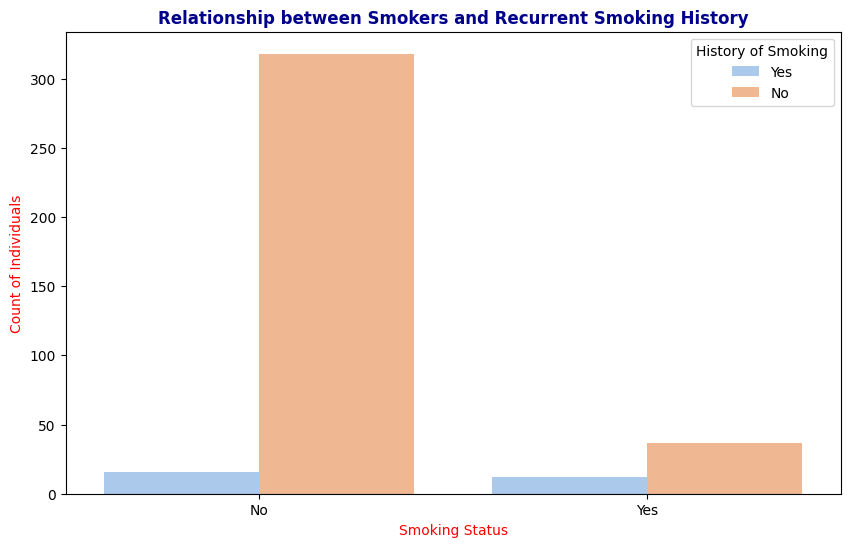

In [10]:
# Relationship between Smokers and Recurrent Smoking History
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking', hue='Hx Smoking', hue_order=['Yes', 'No'], data=train_df, palette='pastel')
plt.title('Relationship between Smokers and Recurrent Smoking History', color='darkblue', fontweight='bold')
plt.xlabel('Smoking Status', color='red')
plt.ylabel('Count of Individuals', color='red')
plt.legend(title='History of Smoking', loc='upper right')
plt.grid(False)
plt.show()

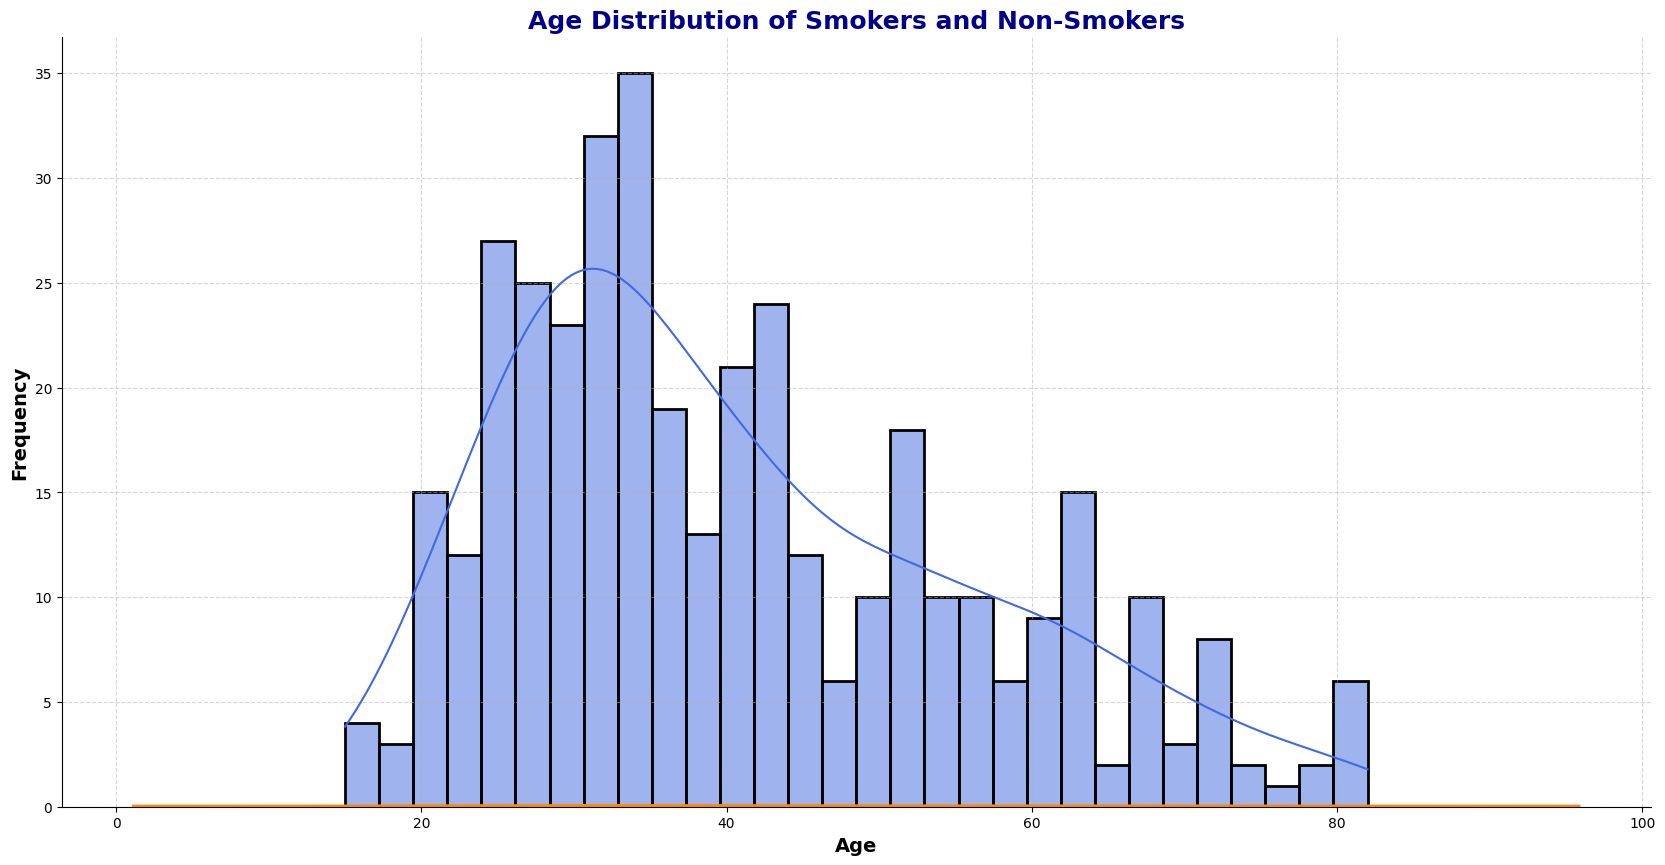

In [11]:
    # Age Distribution Chart
    plt.figure(figsize=(20.5, 10))
    
    # Create a customized histogram with KDE
    sns.histplot(train_df['Age'], kde=True, color='royalblue', linewidth=2, bins=30, edgecolor='black')
    
    # Set the title and axis labels 
    plt.title('Age Distribution of Smokers and Non-Smokers', fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel('Age', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    
    # Customize the KDE line color and style
    sns.kdeplot(train_df['Age'], color='darkorange', lw=3)
    
    # Improve grid and border for clarity
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Show the plot
    plt.show()

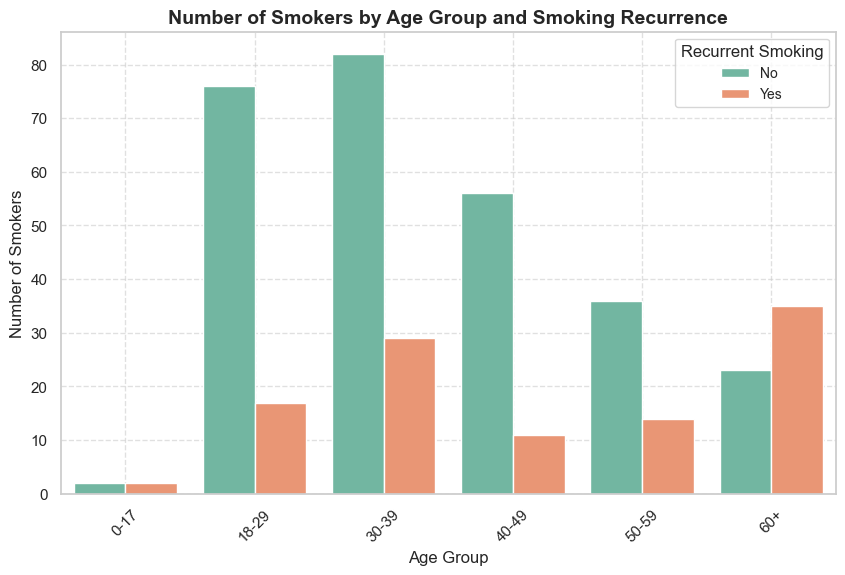

In [12]:
# Count of Smokers by Age Group (Grouped Bar Chart)
age_bins = [0, 18, 30, 40, 50, 60, 100]  # Define your bins here
age_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60+']  # Add an extra label for the first bin

train_df['Age_Group'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count of Smokers by Age Group (Grouped Bar Chart)
plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")
sns.countplot(x='Age_Group', hue='Recurred', data=train_df, palette='Set2')

plt.title('Number of Smokers by Age Group and Smoking Recurrence', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Smokers', fontsize=12)

# the legend
plt.legend(title='Recurrent Smoking', labels=['No', 'Yes'], loc='upper right', fontsize=10)

# Rotate the x-axis labels for clarity
plt.xticks(rotation=45)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

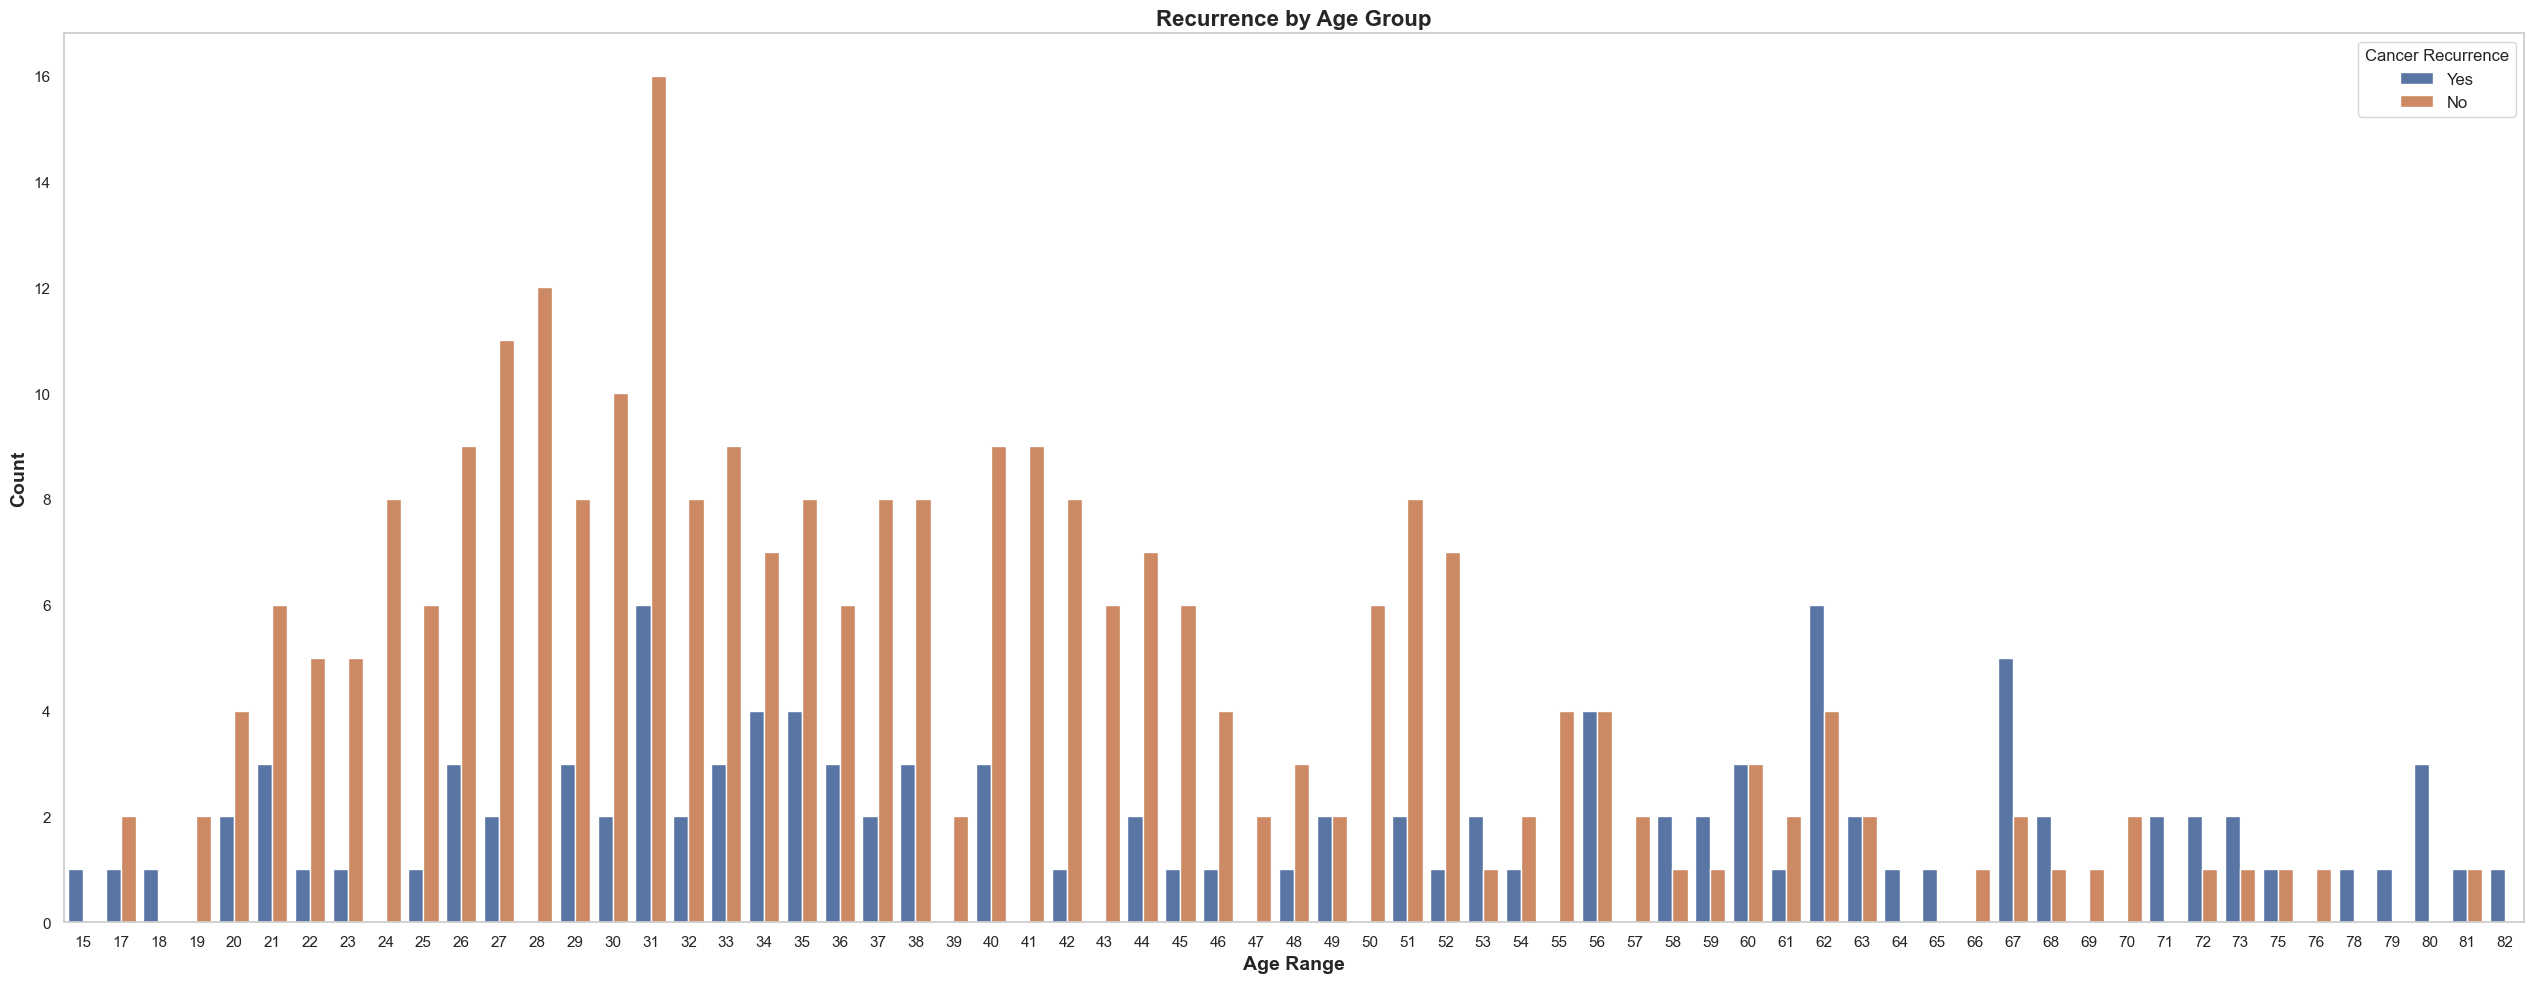

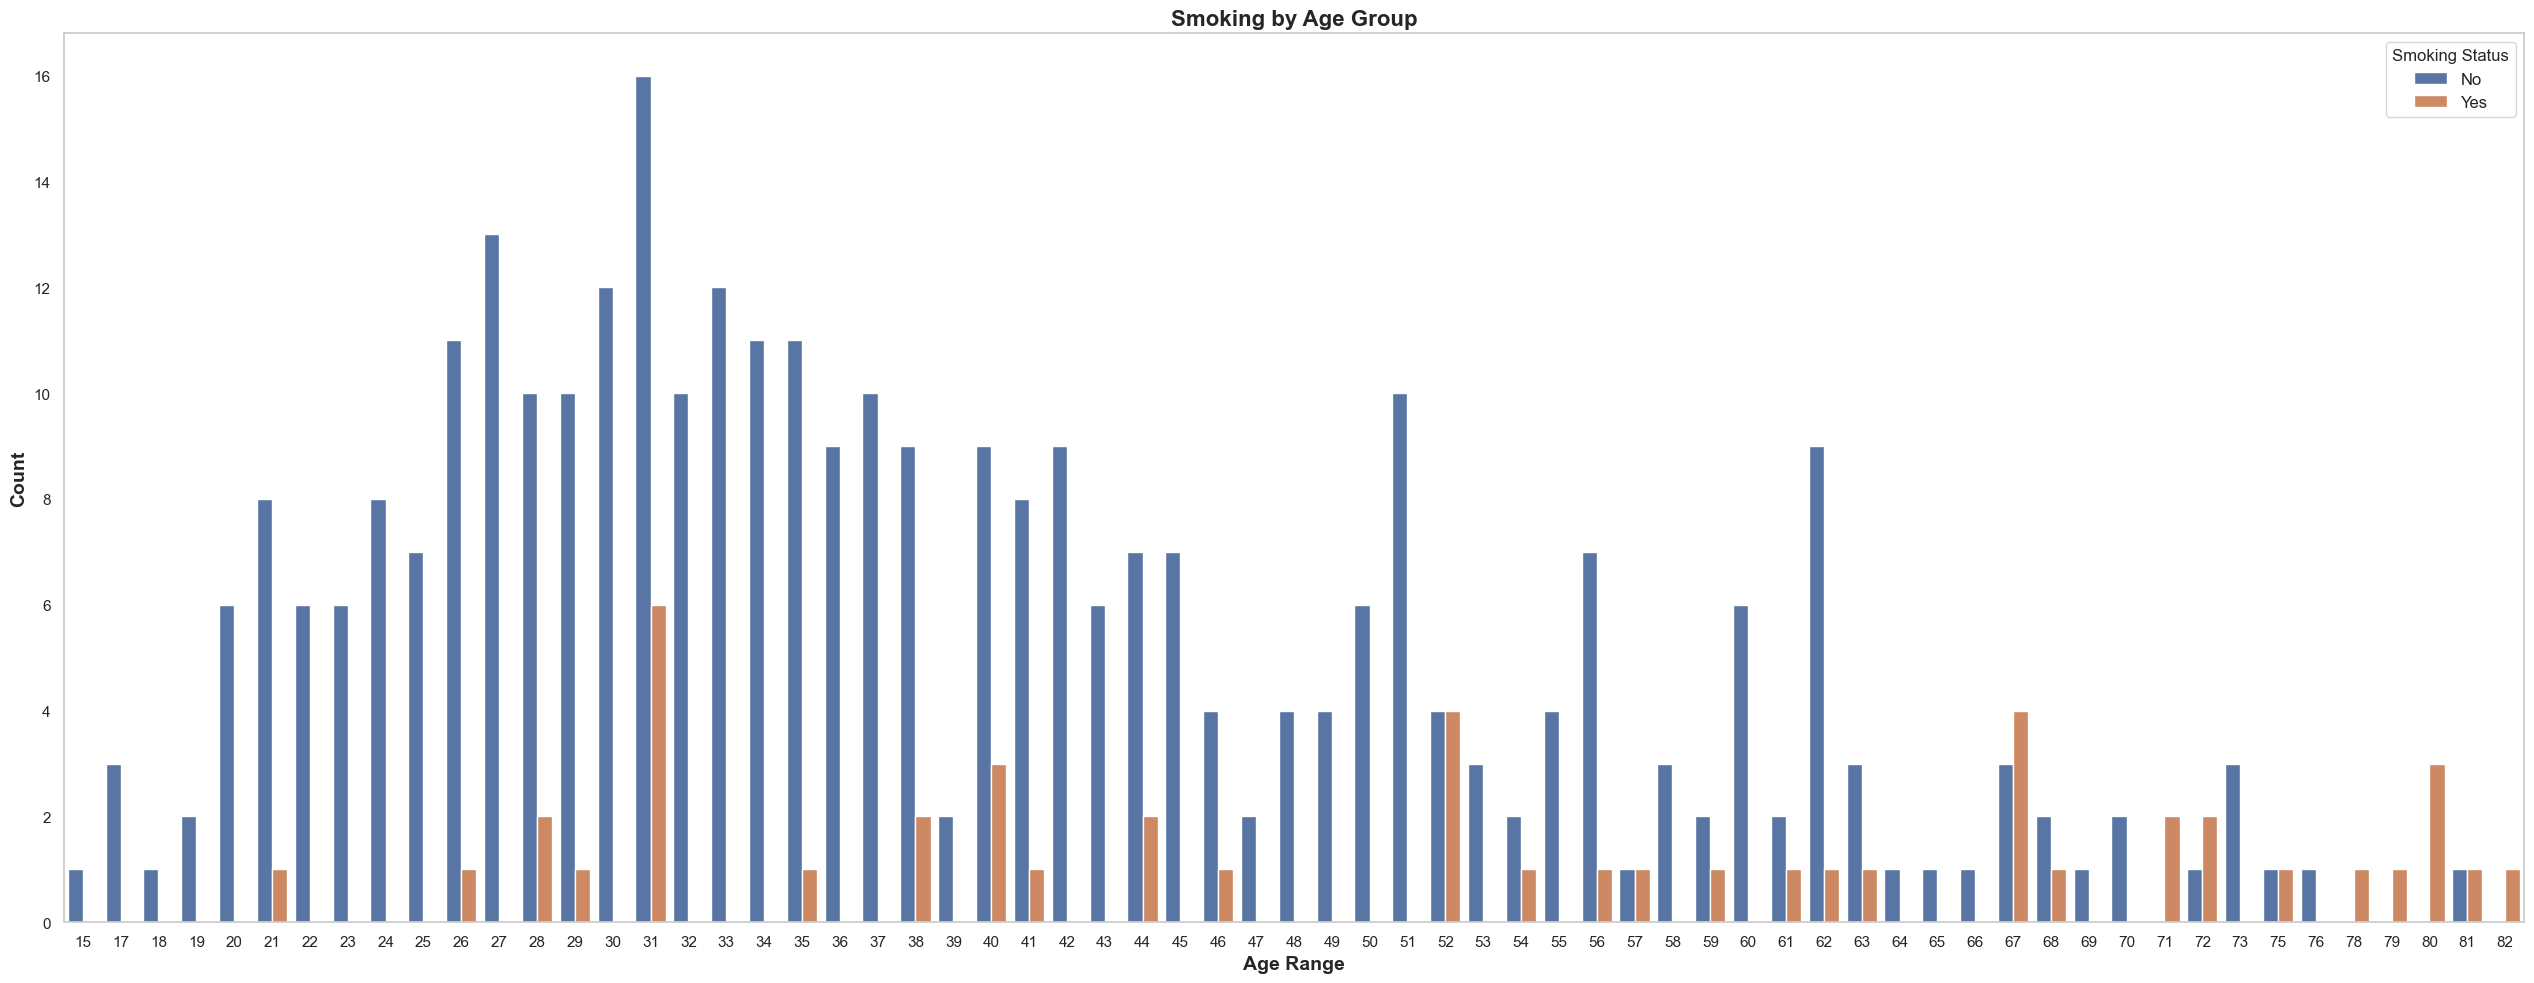

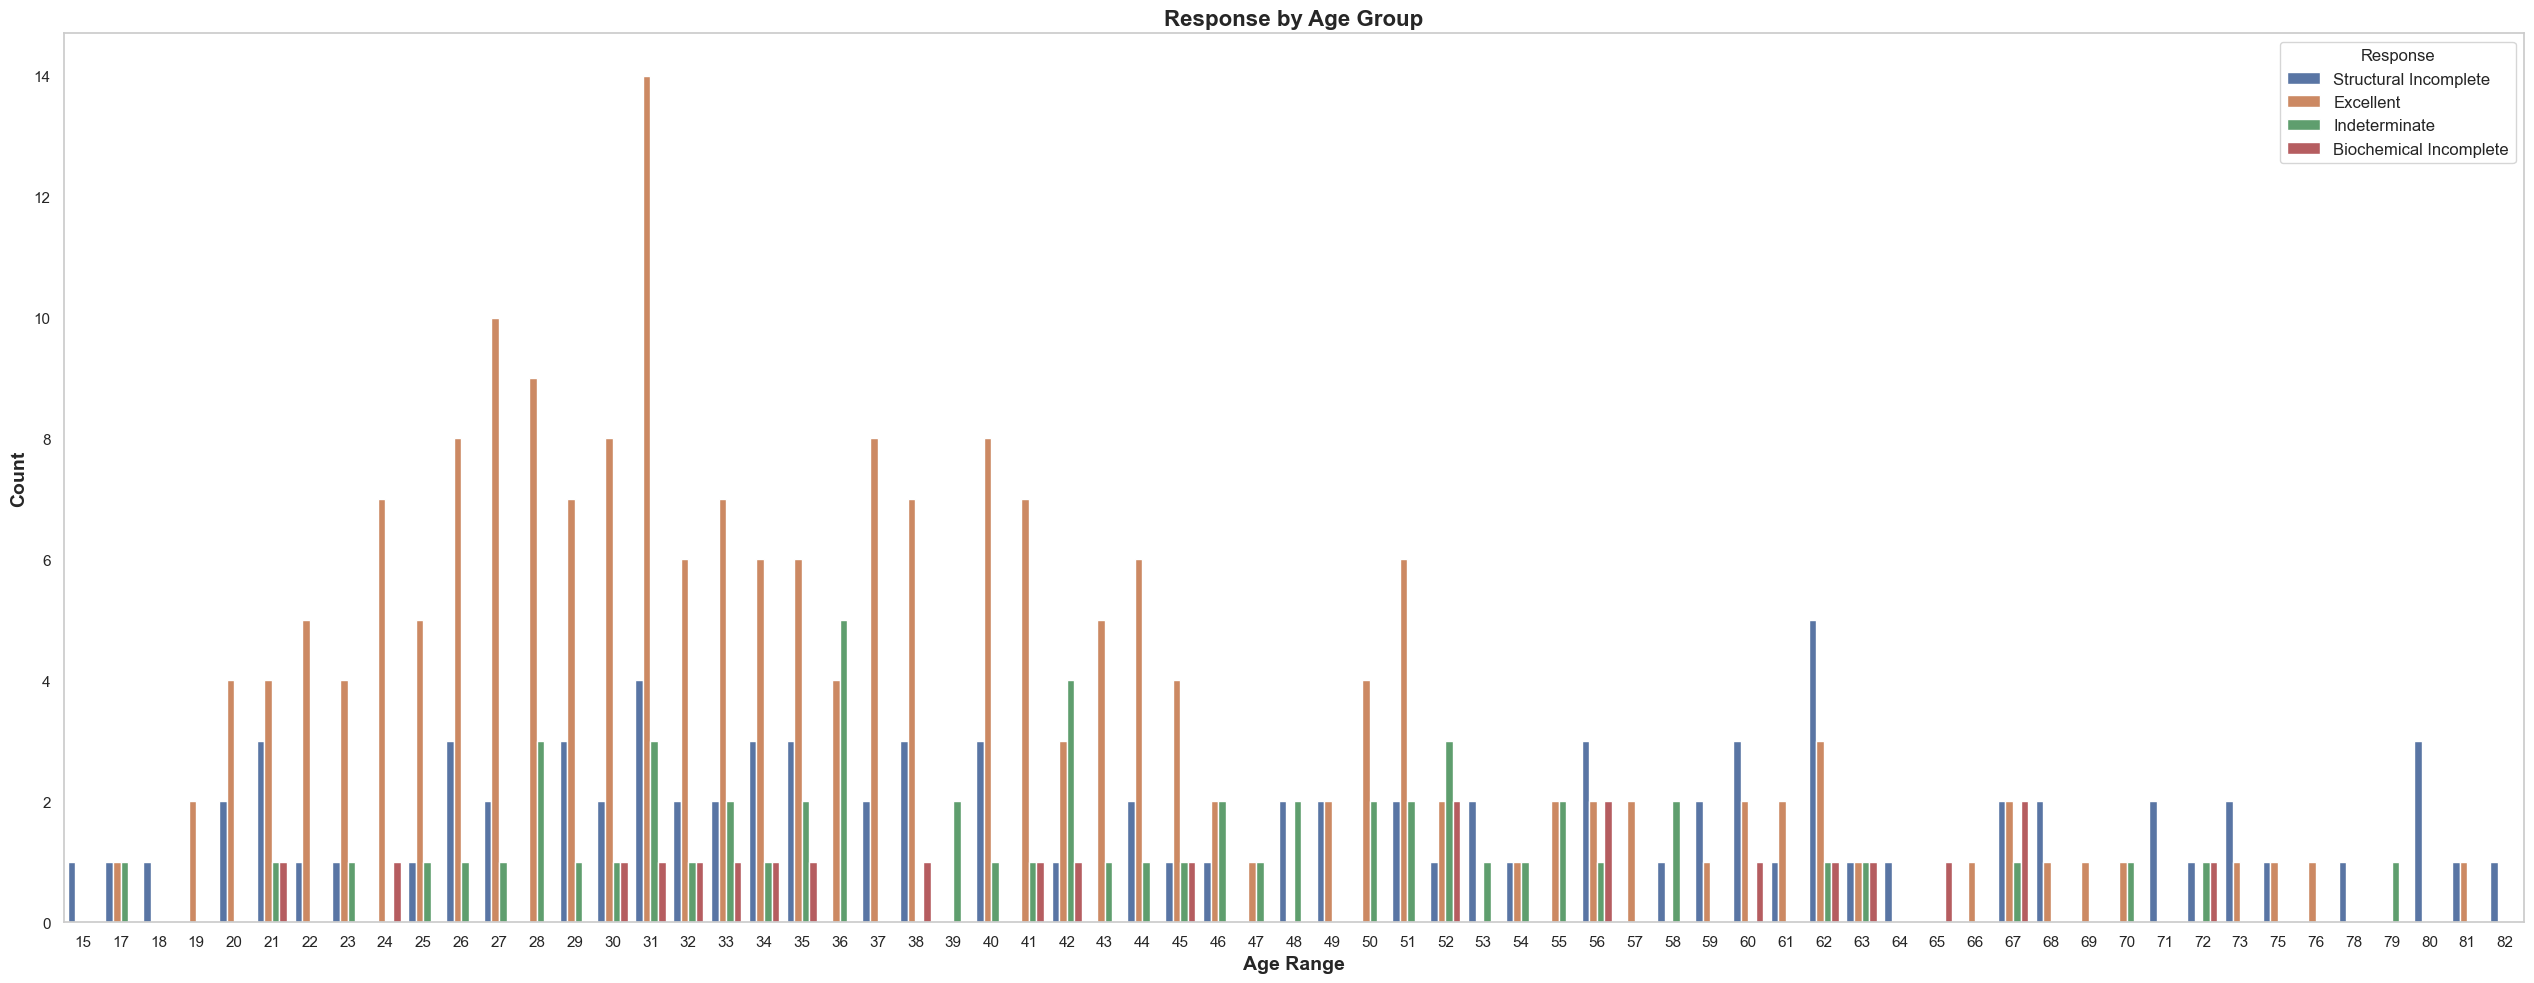

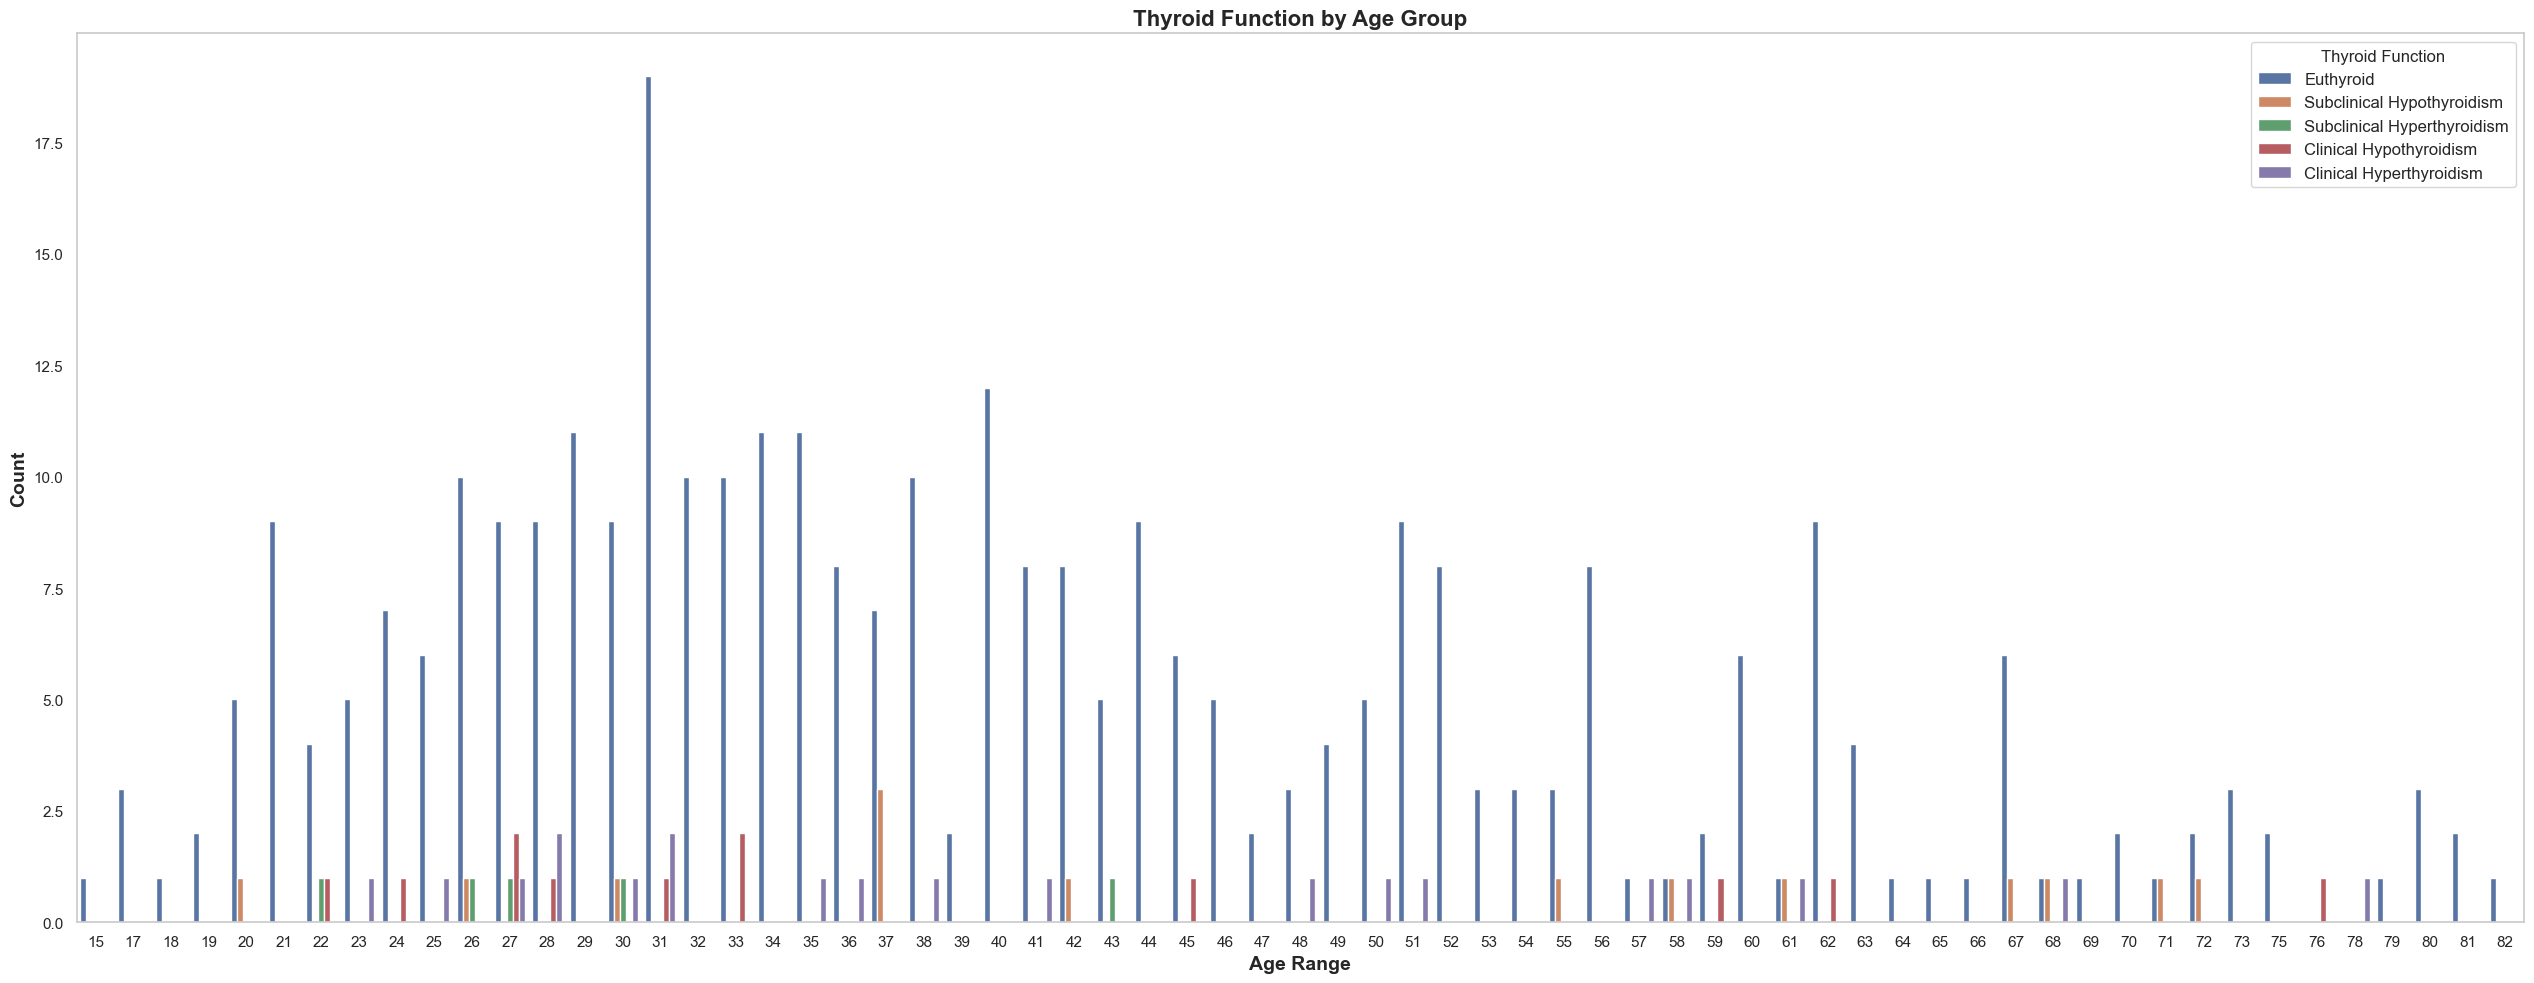

In [13]:
# Count of Recurrences by Age Group (Grouped Bar Chart)
plt.figure(figsize=(25.5, 10))  # Adjusted size for clarity
sns.countplot(x='Age', hue='Recurred', data=train_df)
plt.title('Recurrence by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Range', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Cancer Recurrence', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

# Count of Smokers by Age Group (Grouped Bar Chart)
plt.figure(figsize=(25.5, 10))  # Adjusted size for clarity
sns.countplot(x='Age', hue='Smoking', data=train_df)
plt.title('Smoking by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Range', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Smoking Status', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

# Count of Responses by Age Group (Grouped Bar Chart)
plt.figure(figsize=(25.5, 10))  # Adjusted size for clarity
sns.countplot(x='Age', hue='Response', data=train_df)
plt.title('Response by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Range', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Response', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

# Count of Thyroid Function by Age Group (Grouped Bar Chart)
plt.figure(figsize=(25.5, 10))  # Adjusted size for clarity
sns.countplot(x='Age', hue='Thyroid Function', data=train_df)
plt.title('Thyroid Function by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Range', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Thyroid Function', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

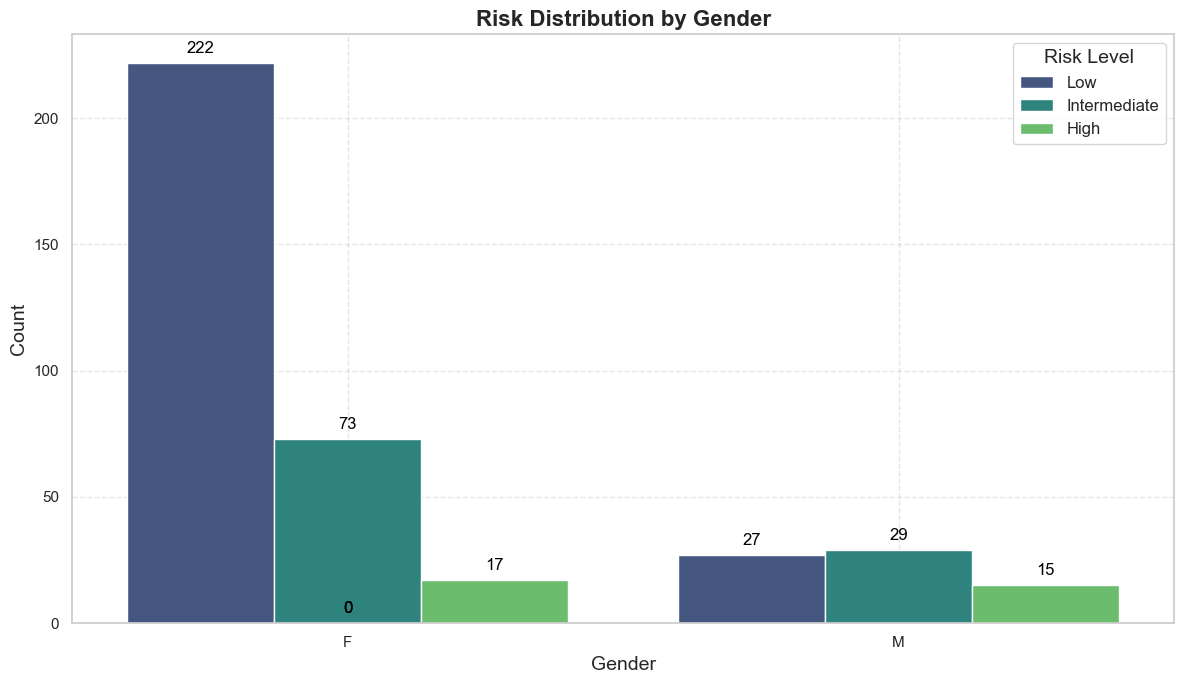

In [14]:
# Analysis of Categorical Variables: Distribution by Gender
plt.figure(figsize=(12, 7))  # Larger figure size for better readability

# Ordering the DataFrame by the count of 'Gender' for each 'Risk'
ordered_df = train_df.groupby(['Gender', 'Risk']).size().reset_index(name='Count')
ordered_df = ordered_df.sort_values(by='Count', ascending=False)

# Plotting the bar chart with a clearer color palette
ax = sns.barplot(x='Gender', y='Count', hue='Risk', data=ordered_df, palette='viridis')

# Title and axis labels with improved font sizes and boldness
plt.title('Risk Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Enhancing the legend for clarity
plt.legend(title='Risk Level', fontsize=12, title_fontsize=14, loc='upper right')

# Adding numbers inside the bars for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adding a light grid for contrast
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusting layout for optimal spacing
plt.tight_layout()
plt.show()

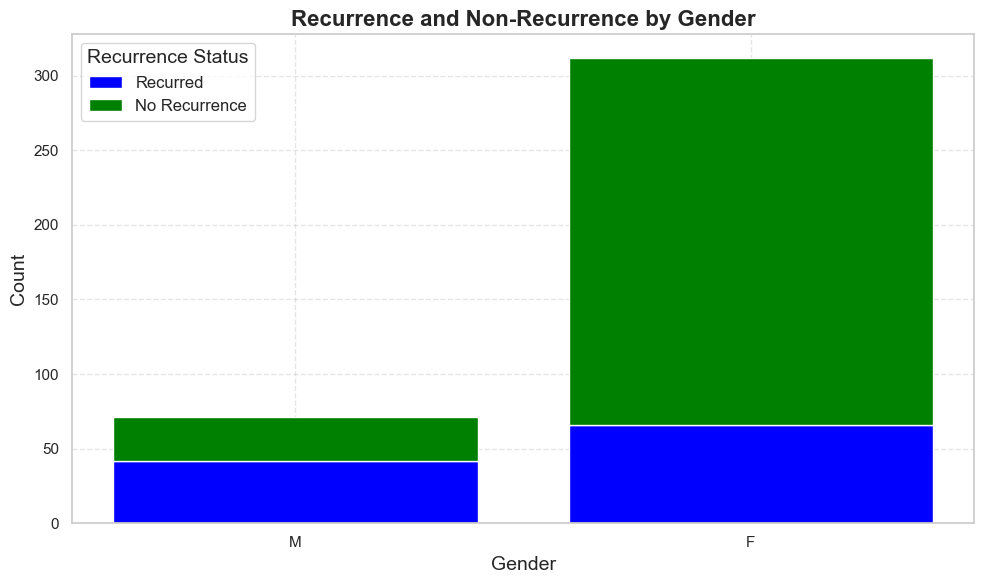

In [15]:
# Stacked Bar Chart for Recurrence and Non-Recurrence by Gender
recurred_counts = train_df[train_df['Recurred'] == 'Yes']['Gender'].value_counts()
non_recurred_counts = train_df[train_df['Recurred'] == 'No']['Gender'].value_counts()

# Aligning the indexes of both series to ensure consistency when stacking
all_genders = list(set(recurred_counts.index).union(set(non_recurred_counts.index)))
recurred_counts = recurred_counts.reindex(all_genders, fill_value=0)
non_recurred_counts = non_recurred_counts.reindex(all_genders, fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot for Recurrence (Yes)
plt.bar(recurred_counts.index, recurred_counts, color='blue', label='Recurred')

# Plot for Non-Recurrence (No)
plt.bar(non_recurred_counts.index, non_recurred_counts, bottom=recurred_counts, color='green', label='No Recurrence')

# Title and labels with improved font sizes and boldness
plt.title('Recurrence and Non-Recurrence by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding a legend with improved font size
plt.legend(title='Recurrence Status', fontsize=12, title_fontsize=14)

# Enhancing the grid for clarity
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot with tight layout
plt.tight_layout()
plt.show()


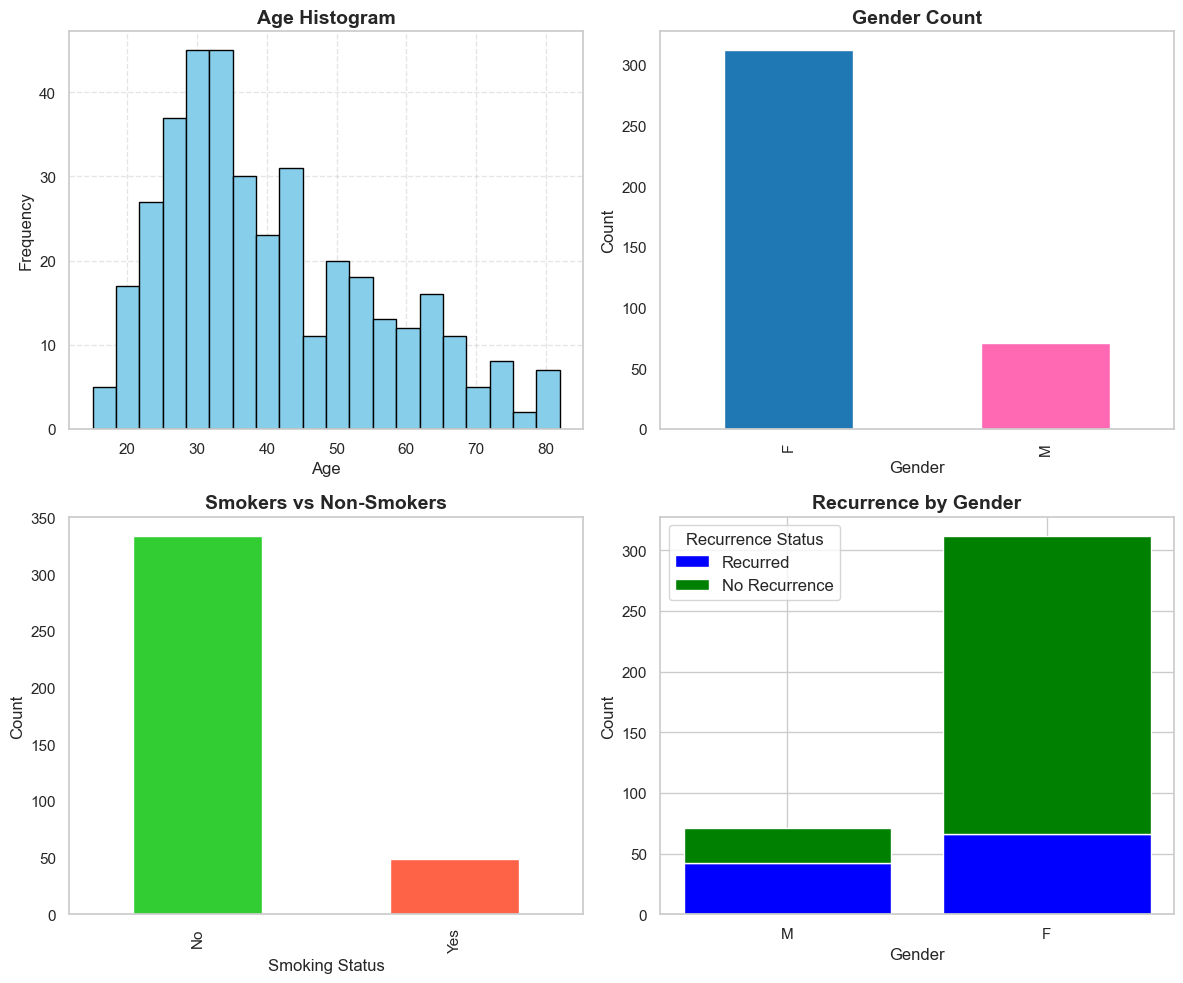

In [16]:
# Creating subplots with updated style and clarity
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Histogram of Age
axs[0, 0].hist(train_df['Age'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Histogram', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Age', fontsize=12)
axs[0, 0].set_ylabel('Frequency', fontsize=12)
axs[0, 0].grid(True, linestyle='--', alpha=0.5)

# 2. Gender Count Bar Chart
train_df['Gender'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff69b4'], ax=axs[0, 1])
axs[0, 1].set_title('Gender Count', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Gender', fontsize=12)
axs[0, 1].set_ylabel('Count', fontsize=12)
axs[0, 1].grid(False)

# 3. Smoker vs Non-Smoker Bar Chart
train_df['Smoking'].value_counts().plot(kind='bar', color=['#32cd32', '#ff6347'], ax=axs[1, 0])
axs[1, 0].set_title('Smokers vs Non-Smokers', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Smoking Status', fontsize=12)
axs[1, 0].set_ylabel('Count', fontsize=12)
axs[1, 0].grid(False)

# 4. Stacked Bar Chart for Recurrence by Gender
recurred_counts = train_df[train_df['Recurred'] == 'Yes']['Gender'].value_counts()
non_recurred_counts = train_df[train_df['Recurred'] == 'No']['Gender'].value_counts()

# Align the indices
all_genders = list(set(recurred_counts.index).union(set(non_recurred_counts.index)))
recurred_counts = recurred_counts.reindex(all_genders, fill_value=0)
non_recurred_counts = non_recurred_counts.reindex(all_genders, fill_value=0)

# Plotting the stacked bar chart
axs[1, 1].bar(recurred_counts.index, recurred_counts, color='blue', label='Recurred')
axs[1, 1].bar(non_recurred_counts.index, non_recurred_counts, bottom=recurred_counts, color='green', label='No Recurrence')
axs[1, 1].set_title('Recurrence by Gender', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('Gender', fontsize=12)
axs[1, 1].set_ylabel('Count', fontsize=12)
axs[1, 1].legend(title='Recurrence Status', fontsize=12)

# Layout adjustment for better spacing
plt.tight_layout()

# Displaying the plots
plt.show()


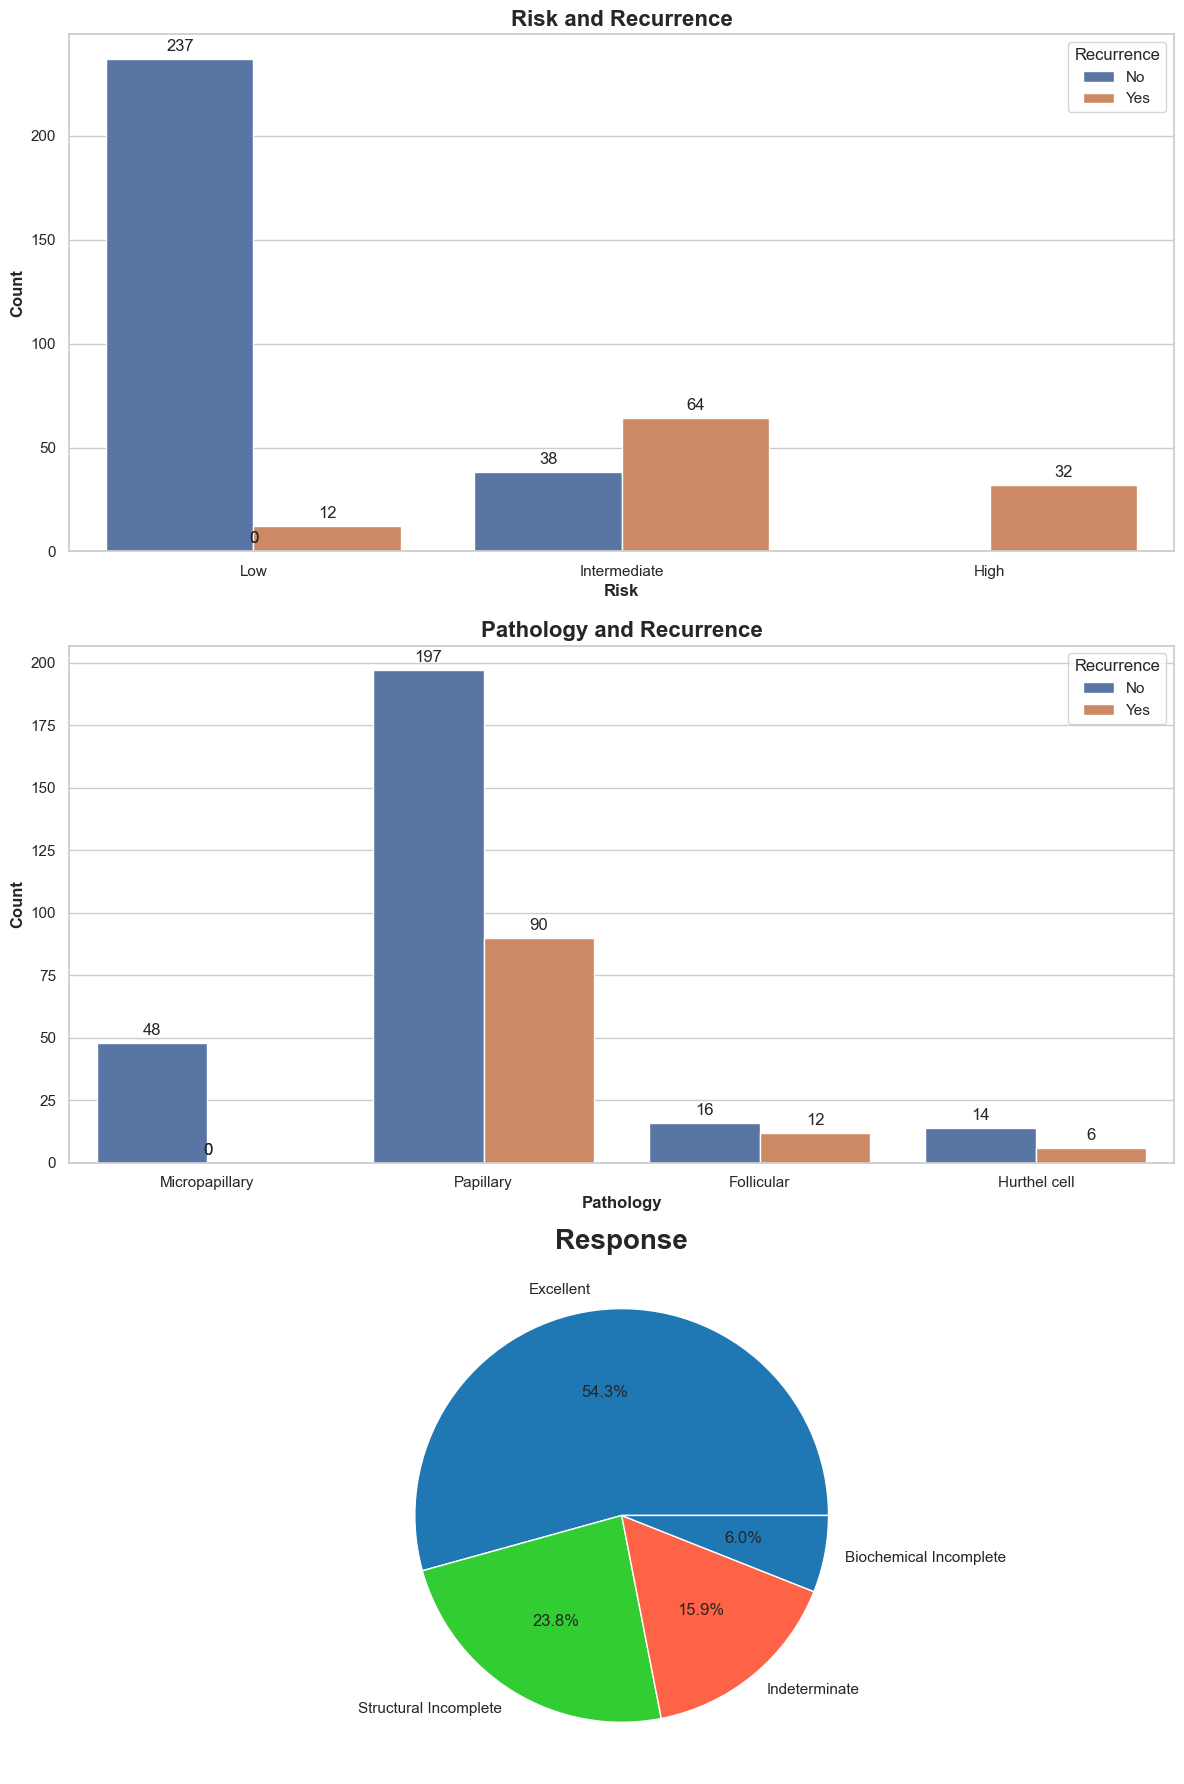

In [17]:
# Creating subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# 1. Bar Chart for Risk and Recurrence
sns.countplot(data=train_df, x='Risk', hue='Recurred', ax=axs[0])
axs[0].set_title('Risk and Recurrence', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Risk', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axs[0].legend(title='Recurrence')

# Adding numbers within the Stage and Recurrence graph
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')

# 2. Stacked Bar Chart for Pathology and Recurrence
sns.countplot(data=train_df, x='Pathology', hue='Recurred', ax=axs[1])
axs[1].set_title('Pathology and Recurrence', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Pathology', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axs[1].legend(title='Recurrence')

# Adding numbers within the Pathology and Recurrence graph
for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')

# 3. Pie Chart for Response
train_df['Response'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                          colors=['#1f77b4', '#32cd32', '#ff6347'], ax=axs[2])
axs[2].set_title('Response', fontsize=20, fontweight='bold')
axs[2].set_ylabel('')

# Adjusting layout
plt.tight_layout()

# Displaying the subplots
plt.show()

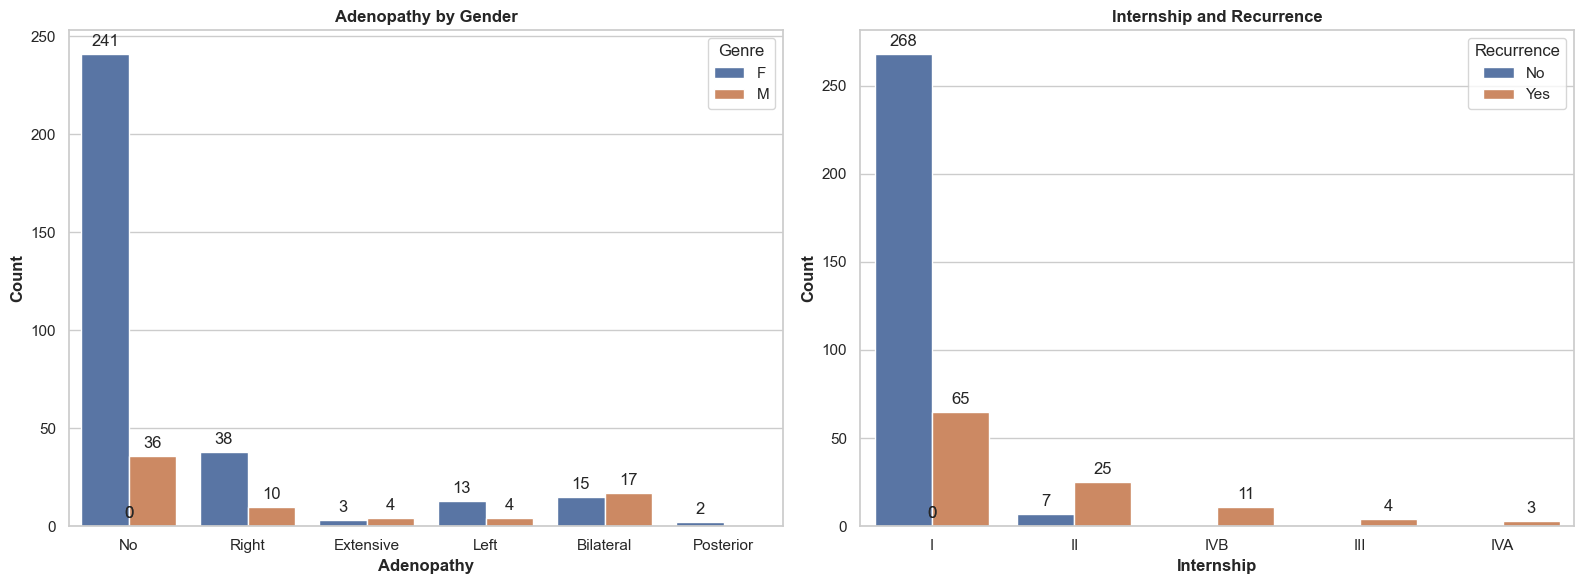

In [18]:
# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Bar Chart for Adenopathy by Gender
sns.countplot(data=train_df, x='Adenopathy', hue='Gender', ax=axs[0])
axs[0].set_title('Adenopathy by Gender', fontweight='bold')
axs[0].set_xlabel('Adenopathy', fontweight='bold')
axs[0].set_ylabel('Count', fontweight='bold')
axs[0].legend(title='Genre')

# Adding numbers within the Adenopathy by Gender chart
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

# Stacked Bar Chart for Internship and Recurrence
sns.countplot(data=train_df, x='Stage', hue='Recurred', ax=axs[1])
axs[1].set_title('Internship and Recurrence', fontweight='bold')
axs[1].set_xlabel('Internship', fontweight='bold')
axs[1].set_ylabel('Count', fontweight='bold')
axs[1].legend(title='Recurrence')

# Adding numbers within the Stage and Recurrence graph
for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

# Adjusting layout
plt.tight_layout()

# Displaying the subplots
plt.show()

# 4. Data Cleaning

In [19]:
# 1. Handling Missing Values
print("Number of missing values ​​per column:")
print(train_df.isnull().sum())

Number of missing values ​​per column:
Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
Age_Group               0
dtype: int64


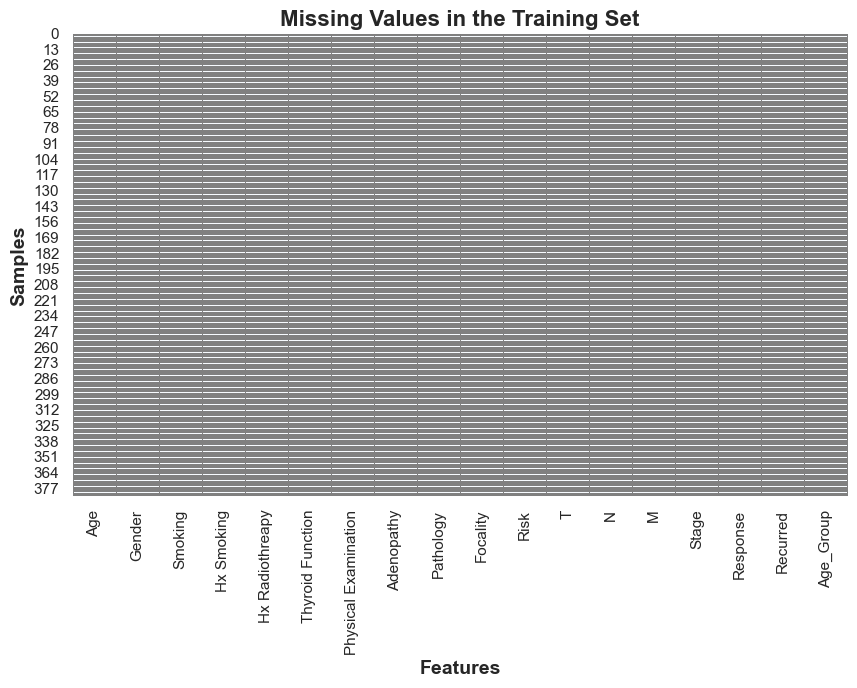

In [20]:
# View missing values with a different color scheme
plt.figure(figsize=(10, 6))

sns.heatmap(train_df.isnull(), cbar=False, cmap="Blues", linewidths=0.5, linecolor='gray')

# Title and labels
plt.title("Missing Values in the Training Set", fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Samples', fontsize=14, fontweight='bold')

plt.show()

# 5. Checking for Outliers

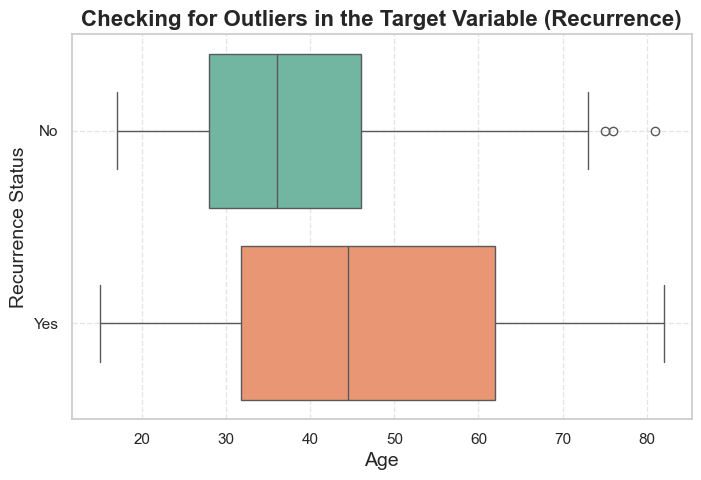

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, y="Recurred", x="Age", hue="Recurred", palette="Set2")

# Title and labels
plt.title("Checking for Outliers in the Target Variable (Recurrence)", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Recurrence Status", fontsize=14)

# Gridline adjustments for better visibility
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

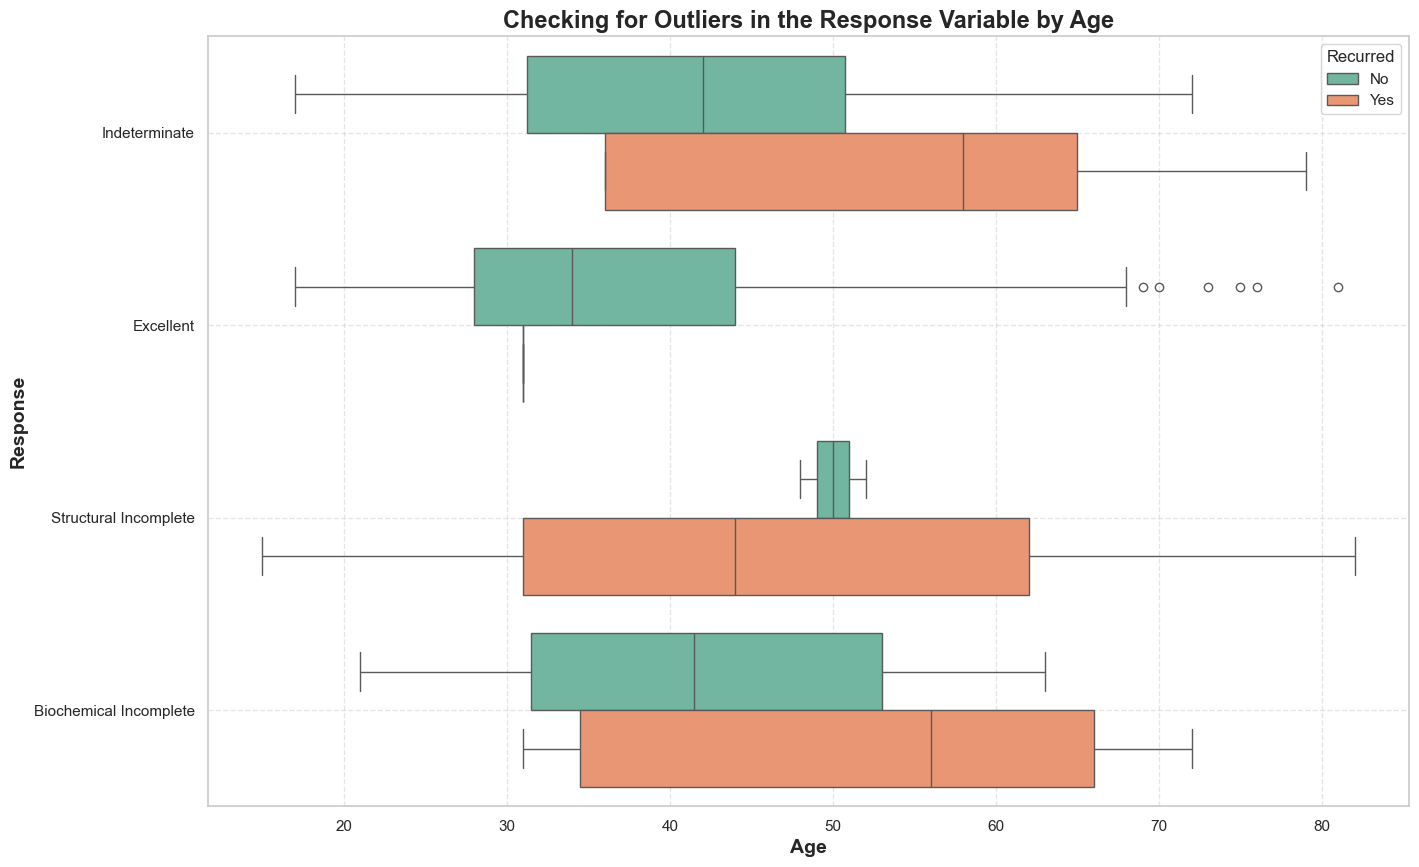

In [22]:
plt.figure(figsize=(15.5, 10))
sns.boxplot(data=train_df, y="Response", x="Age", hue="Recurred", palette="Set2")

# Title and labels with font adjustments
plt.title("Checking for Outliers in the Response Variable by Age", fontsize=17, fontweight="bold")
plt.xlabel("Age", fontsize=14, fontweight='bold')
plt.ylabel("Response", fontsize=14, fontweight='bold')

# Adjusting gridlines for better clarity
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

# 6. Feature Engineering

In [23]:
# Viewing column
train_df.Recurred.head()

0    No
1    No
2    No
3    No
4    No
Name: Recurred, dtype: object

In [24]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
train_df['Recurred_2'] = label_encoder.fit_transform(train_df['Recurred'])

# Viewing
label_encoder

LabelEncoder()

In [25]:
# Viewing dataset
train_df.Recurred_2.head()

0    0
1    0
2    0
3    0
4    0
Name: Recurred_2, dtype: int64

In [26]:
# Copy the original data to avoid modifying the original DataFrame
train_data_encoded = train_df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical variable
for col in ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy',
           "Pathology", 'Focality', 'Risk', 'T', "N", "M", "Stage", "Response", "Recurred"]:
    train_data_encoded[col] = label_encoder.fit_transform(train_data_encoded[col])
    
# Viewing dataset
label_encoder

LabelEncoder()

In [27]:
# View the first DataFrame records after encoding
train_data_encoded.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Age_Group,Recurred_2
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0,18-29,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0,30-39,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,30-39,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,60+,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0,60+,0


In [28]:
# Delete the 'Name' column, for example
train_data_encoded.drop(columns=['Recurred_2'], inplace=True)

# View the first records of the DataFrame after column deletion
train_data_encoded.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Age_Group
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0,18-29
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0,30-39
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,30-39
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,60+
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0,60+


In [56]:
# Fill missing values
train_data_encoded.ffill(inplace=True)

In [57]:
train_data_encoded

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Age_Group
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0,18-29
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0,30-39
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,30-39
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,60+
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1,60+
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1,60+
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1,60+
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1,60+


# 7. Training and Testing Division

In [58]:
# Resources
X = train_data_encoded.drop(columns=['Recurred'])

# Target variable
y = train_data_encoded['Recurred']

In [59]:
# Viewing rows and columns x
X.shape

(383, 17)

In [60]:
# Viewing rows and columns
y.shape

(383,)

# 8. Model Training

In [61]:
# Importing library
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
# Step 3: Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing rows and columns
print("Visualizing rows and columns X_train", X_train.shape)

# Viewing rows and columns
print("Visualizing rows and columns y_train", y_train.shape)

Visualizing rows and columns X_train (306, 17)
Visualizing rows and columns y_train (306,)


# 9. Machine Learning Model

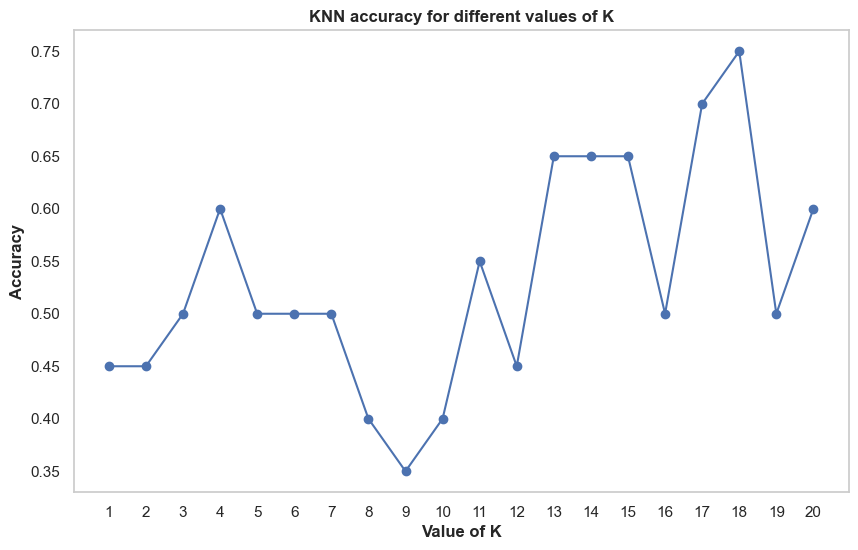

Best value of K: 18
Corresponding accuracy: 0.75


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  # Import train_test_split

# Sample Data (replace with your actual data)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = np.random.randint(0, 2, 100)  # 100 labels (0 or 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values of K', fontweight="bold")
plt.xlabel('Value of K', fontweight="bold")
plt.ylabel('Accuracy', fontweight="bold")
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [85]:
import warnings
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load dataset 
data = load_iris()
X = data.data
y = data.target

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(solver='lbfgs', max_iter=200),
    AdaBoostClassifier(random_state=45),
    XGBClassifier(tree_method='hist', device='cuda', random_state=42),
    LGBMClassifier(num_leaves=31, n_estimators=100, max_depth=5)
]

# Define StratifiedKFold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model with cross-validation
for i, model in enumerate(models):
    print(f"Evaluating model {i+1}: {model.__class__.__name__}...")
    
    # Collect cross-validation scores
    cv_scores = []
    
    for train_idx, val_idx in kf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        model.fit(X_train, y_train)
        val_pred = model.predict(X_val)
        val_accuracy = accuracy_score(y_val, val_pred)
        cv_scores.append(val_accuracy)
    
    # Collect results: mean accuracy and standard deviation
    mean_accuracy = np.mean(cv_scores)
    std_deviation = np.std(cv_scores)
    
    print(f"Cross-validation Mean Accuracy: {mean_accuracy}")
    print(f"Cross-validation Standard Deviation: {std_deviation}")
    print("---------------------------------------------------------------------------------------------------------------")

Evaluating model 1: GaussianNB...
Cross-validation Mean Accuracy: 0.9466666666666667
Cross-validation Standard Deviation: 0.039999999999999994
---------------------------------------------------------------------------------------------------------------
Evaluating model 2: DecisionTreeClassifier...
Cross-validation Mean Accuracy: 0.9533333333333335
Cross-validation Standard Deviation: 0.03399346342395189
---------------------------------------------------------------------------------------------------------------
Evaluating model 3: RandomForestClassifier...
Cross-validation Mean Accuracy: 0.9466666666666667
Cross-validation Standard Deviation: 0.02666666666666666
---------------------------------------------------------------------------------------------------------------
Evaluating model 4: LogisticRegression...
Cross-validation Mean Accuracy: 0.9666666666666668
Cross-validation Standard Deviation: 0.029814239699997188
--------------------------------------------------------------

In [86]:
print(np.unique(y_train))

[0 1 2]


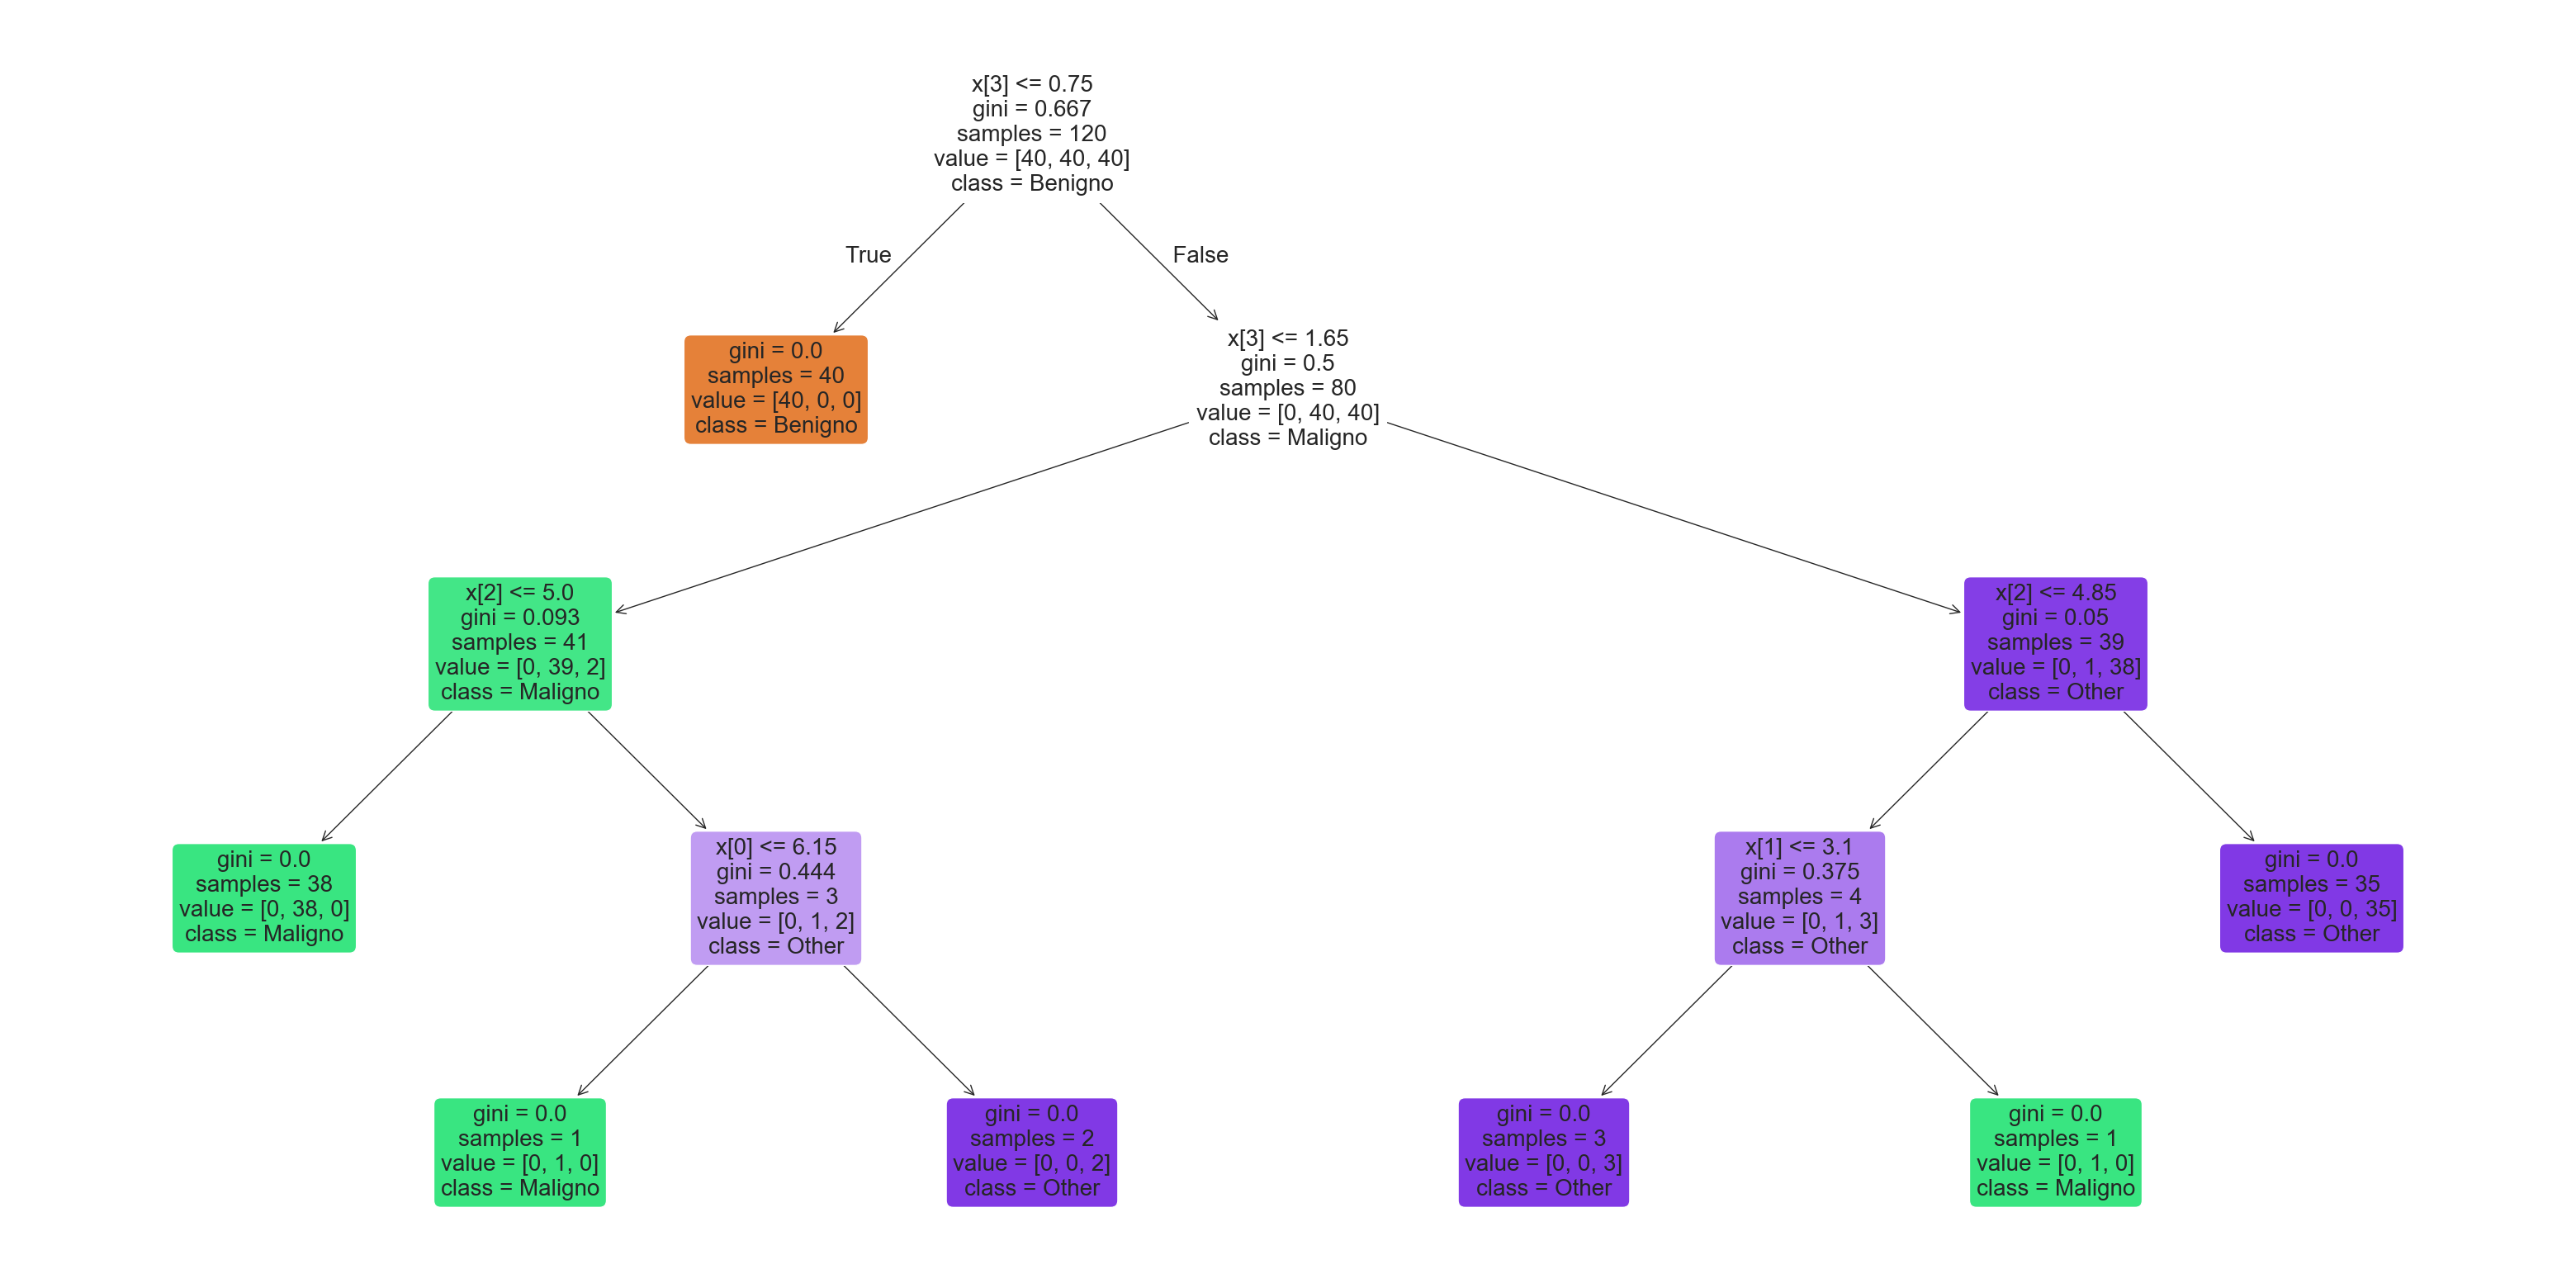

In [87]:
# Importando biblioteca
from sklearn.tree import DecisionTreeClassifier 

# Criando modelo decision tree
model_dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)

# Treinamento modelo
model_dtc_fit = model_dtc.fit(X_train, y_train)

from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
fig, ax = plt.subplots(figsize=(40, 20), facecolor="w")
tree.plot_tree(model_dtc, 
               ax=ax, 
               fontsize=20, 
               rounded=True, 
               filled=True, 
               class_names = ["Benigno", "Maligno", "Other"])  # Updated class names
plt.show()

In [89]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (120, 4)
X_test shape: (20, 2)


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Evaluate
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.975
Testing Accuracy: 1.0


In [97]:
# Make predictions on the test set
predictions = model.predict(X_test)
print(f"Predictions: {predictions}")

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# 10. Confusion Matrix

Unique values in y: [0 1]
Value counts in y:
 1    55
0    45
Name: count, dtype: int64
y_train shape: (80,)
y_test shape: (20,)
Model 1: LogisticRegression
Training Accuracy: 0.6125
Testing Accuracy: 0.55

Confusion matrix 

 [[2 4]
 [5 9]]

True Positives(TP) =  2

True Negatives(TN) =  9

False Positives(FP) =  4

False Negatives(FN) =  5


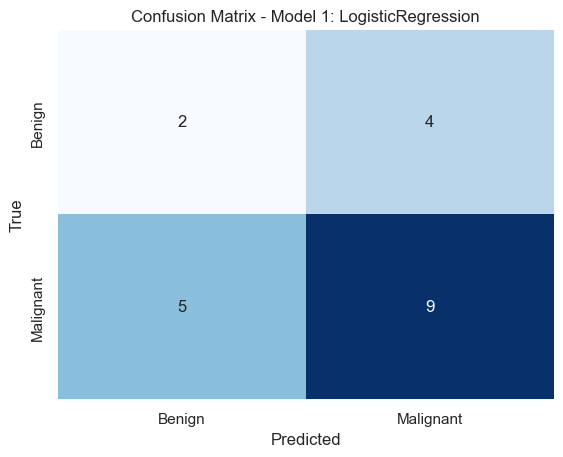

---------------------------------------------------------------------------------------------------------------------------------------
Model 2: SVC
Training Accuracy: 0.6
Testing Accuracy: 0.6

Confusion matrix 

 [[ 1  5]
 [ 3 11]]

True Positives(TP) =  1

True Negatives(TN) =  11

False Positives(FP) =  5

False Negatives(FN) =  3


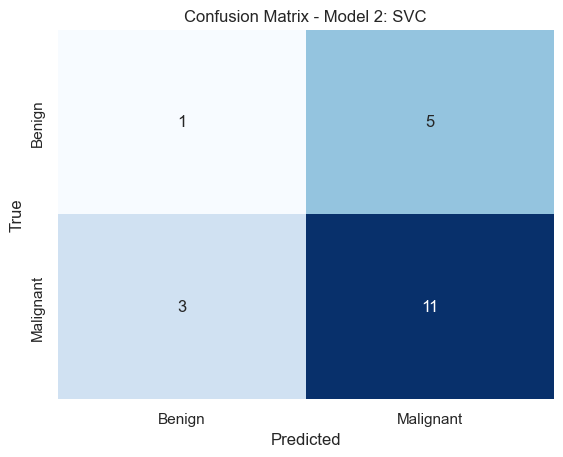

---------------------------------------------------------------------------------------------------------------------------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.75

Confusion matrix 

 [[6 0]
 [5 9]]

True Positives(TP) =  6

True Negatives(TN) =  9

False Positives(FP) =  0

False Negatives(FN) =  5


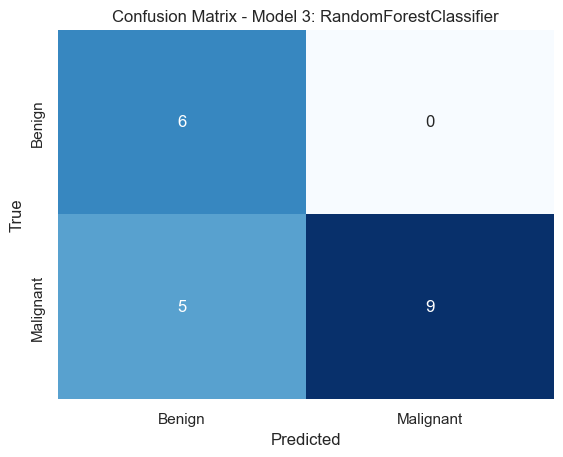

---------------------------------------------------------------------------------------------------------------------------------------
Model 4: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.65

Confusion matrix 

 [[ 3  3]
 [ 4 10]]

True Positives(TP) =  3

True Negatives(TN) =  10

False Positives(FP) =  3

False Negatives(FN) =  4


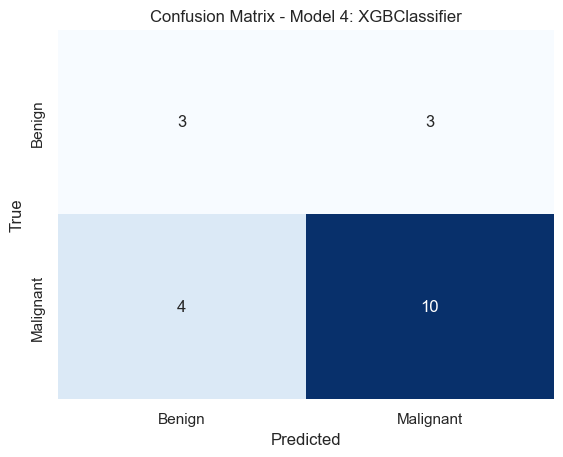

---------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5156 - loss: 0.6892 
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3750 - loss: 0.7056 
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5344 - loss: 0.6932
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5016 - loss: 0.7081
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4922 - loss: 0.7006
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4828 - loss: 0.7060
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4656 - loss: 0.6963
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5500 - loss: 0.6887
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5789 - loss: 0.6895
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5320 - loss: 0.6829
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms

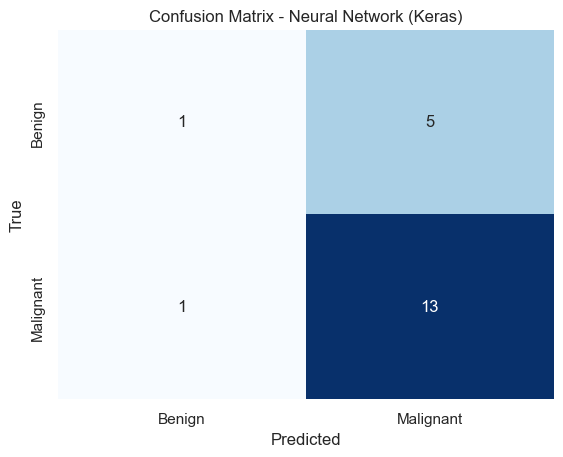

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

# Sample Data (REPLACE with your actual data)
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'label': np.random.choice(['Benign', 'Malignant'], size=100)
})

X = data[['feature1', 'feature2']]
y = data['label']

# 1. Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)

# 2. Convert y to NumPy array
y = np.array(y)  # Ensure it is a numpy array.

# 3. Check Unique Values and Distribution
print("Unique values in y:", np.unique(y))
print("Value counts in y:\n", pd.Series(y).value_counts())

if len(np.unique(y)) <= 1:
    raise ValueError("y contains only one unique value. Cannot train a classifier.")

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Ensure y_train and y_test are 1D arrays (flatten if needed)
y_train = y_train.flatten() if len(y_train.shape) > 1 else y_train
y_test = y_test.flatten() if len(y_test.shape) > 1 else y_test

# Double-check the shape after flattening
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 6. Define Models (Include num_class for XGBoost)
models = [
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    XGBClassifier(objective='binary:logistic')  # Corrected parameter
]

# 7. Neural Network Model using Keras
keras_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape explicitly
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the Keras model
keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 8. Evaluate and Plot Confusion Matrices for all models
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=le.classes_,  
                yticklabels=le.classes_)  
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])

    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------------------------")

# 9. Evaluate Neural Network Model (Keras)
keras_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the Keras model on the test set
keras_train_accuracy = accuracy_score(y_train, (keras_model.predict(X_train) > 0.5))
keras_test_accuracy = accuracy_score(y_test, (keras_model.predict(X_test) > 0.5))

print(f"Neural Network (Keras) - Training Accuracy: {keras_train_accuracy}")
print(f"Neural Network (Keras) - Testing Accuracy: {keras_test_accuracy}")

# Confusion Matrix for Keras Model
keras_cm = confusion_matrix(y_test, (keras_model.predict(X_test) > 0.5))
plt.figure()
sns.heatmap(keras_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=le.classes_,  
            yticklabels=le.classes_)  
print('Keras Model Confusion matrix \n\n', keras_cm)
print('\nTrue Positives(TP) = ', keras_cm[0,0])
print('\nTrue Negatives(TN) = ', keras_cm[1,1])
print('\nFalse Positives(FP) = ', keras_cm[0,1])
print('\nFalse Negatives(FN) = ', keras_cm[1,0])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Neural Network (Keras)")
plt.show()

Model 1: GaussianNB
Training Accuracy: 0.6125
Testing Accuracy: 0.55


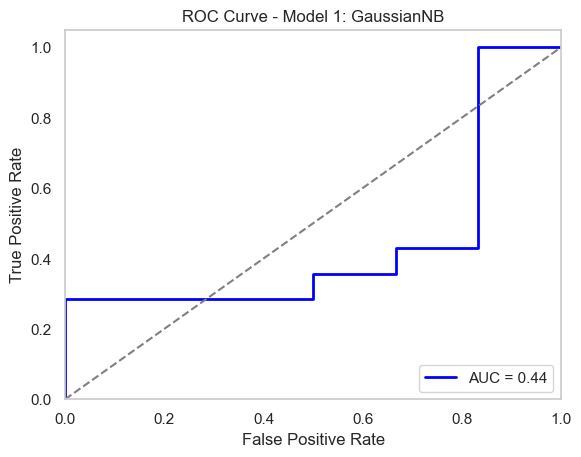

Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.65


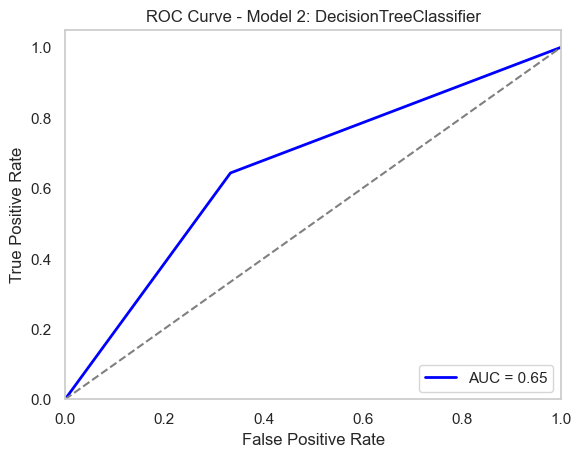

Model 3: KNeighborsClassifier
Training Accuracy: 0.675
Testing Accuracy: 0.55


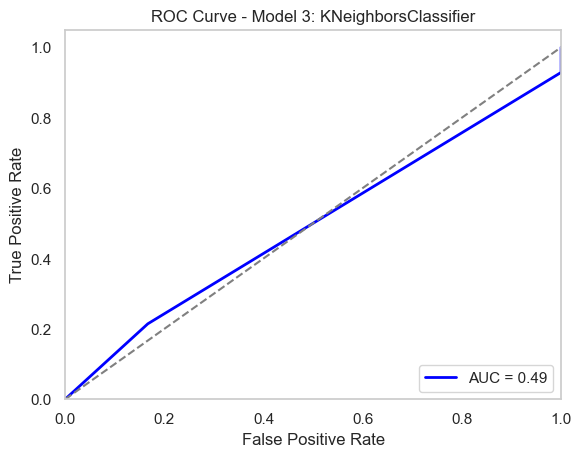

Model 4: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.75


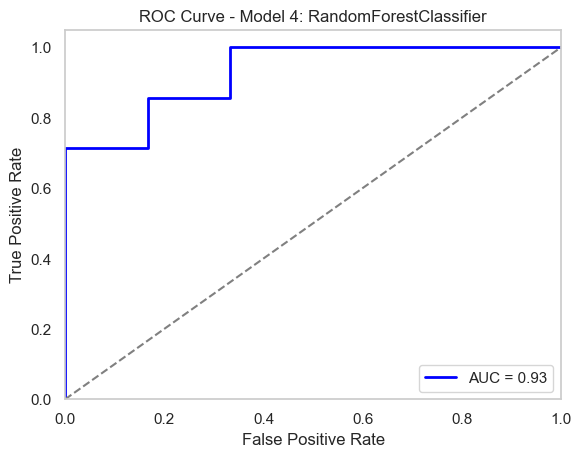

Model 5: LogisticRegression
Training Accuracy: 0.6125
Testing Accuracy: 0.55


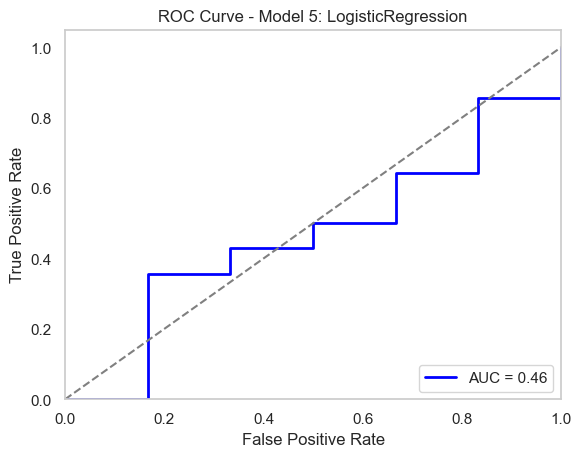

Model 6: AdaBoostClassifier
Training Accuracy: 0.8
Testing Accuracy: 0.6


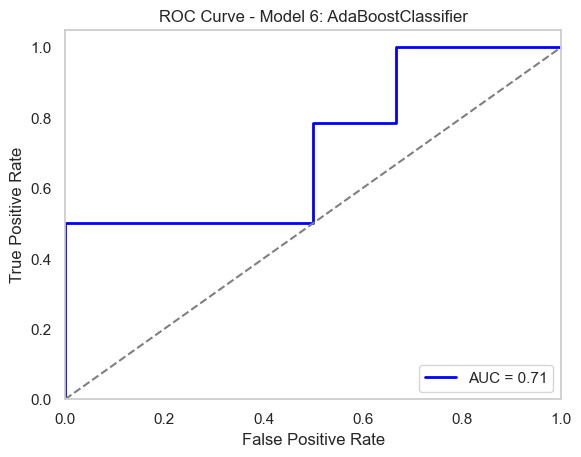

Model 7: SVC
Training Accuracy: 0.6
Testing Accuracy: 0.6


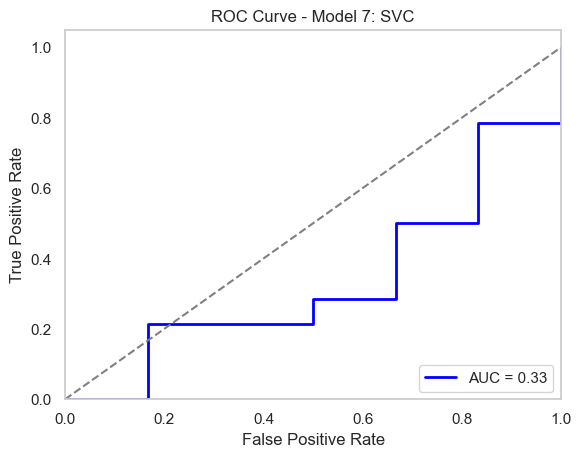

Model 8: GradientBoostingClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.75


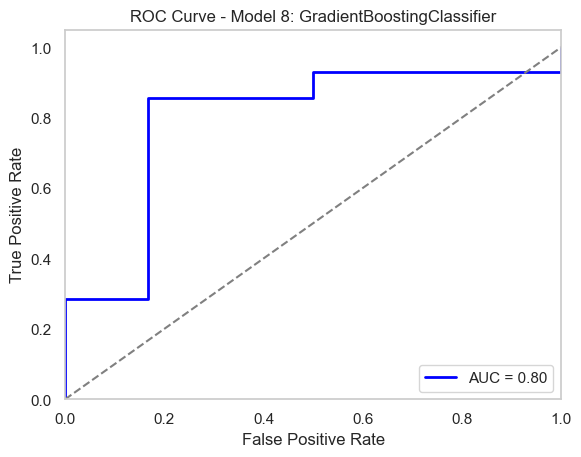

Model 9: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.65


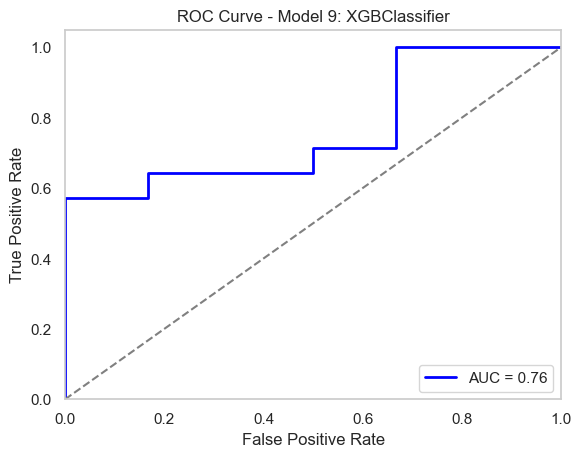

[LightGBM] [Info] Number of positive: 41, number of negative: 39
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 2
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1650 with Max-Q Design, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (0.00 MB) transferred to GPU in 0.000786 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512500 -> initscore=0.050010
[LightGBM] [Info] Start training from score 0.050010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

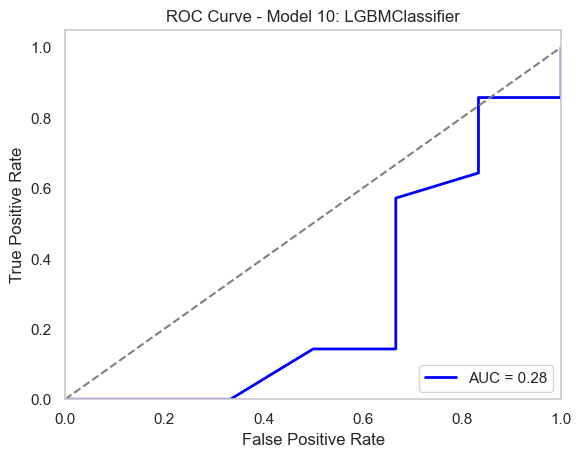

In [99]:
# Importing library
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier  # Add this import
from sklearn.ensemble import GradientBoostingClassifier  # Add this import
from lightgbm import LGBMClassifier  # Add this import

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(device='gpu')]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate positive class probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    
    print("==============================================================================================")

# 11. Model Evaluation

In [100]:
# Classification report
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()
    
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()
    
    print("==========================================================================================================")


Model 1: GaussianNB

Training Accuracy: 0.6125
Testing Accuracy: 0.55

Classification Report:

              precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.67      0.71      0.69        14

    accuracy                           0.55        20
   macro avg       0.43      0.44      0.44        20
weighted avg       0.53      0.55      0.54        20



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.65

Classification Report:

              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.82      0.64      0.72        14

    accuracy                           0.65        20
   macro avg       0.63      0.65      0.63        20
weighted avg       0.71      0.65      0.66        20



Model 3: KNeighborsClassifier

Training Accuracy: 0.675
Testing Accuracy: 0.55

Classification Report:

              precision    recall  f1-

# 12. Deep Learning

In [101]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [102]:
# Database
data = pd.read_csv('dataset.csv')

In [103]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical variable
for col in ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy',
           "Pathology", 'Focality', 'Risk', 'T', "N", "M", "Stage", "Response", "Recurred"]:
    data[col] = label_encoder.fit_transform(data[col])
    
# Viewing dataset
label_encoder

LabelEncoder()

In [104]:
# Separate the resources (X) and the target column (y)
X = data.drop('Recurred', axis=1)
y = data['Recurred']

In [105]:
# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing rows and columns (X)
print("Visualizando linhas e colunas X_train", X_train.shape)

# Viewing rows and columns (Y)
print("Visualizando linhas e colunas y_train", y_train.shape)

Visualizando linhas e colunas X_train (306, 16)
Visualizando linhas e colunas y_train (306,)


In [106]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Viewing
scaler

StandardScaler()

In [107]:
from tensorflow.keras import layers, models

# Define the model
nn_model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Use Input layer for specifying input shape
    layers.Dense(20, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 20)                  │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │             525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 891 (3.48 KB)

 Trainable params: 891 (3.48 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4529 - loss: 0.7269 - val_accuracy: 0.5645 - val_loss: 0.7266
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6753 - loss: 0.6735 - val_accuracy: 0.6452 - val_loss: 0.6814
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7439 - loss: 0.6394 - val_accuracy: 0.7097 - val_loss: 0.6434
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7856 - loss: 0.5962 - val_accuracy: 0.7581 - val_loss: 0.6090
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8212 - loss: 0.5575 - val_accuracy: 0.7903 - val_loss: 0.5743
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8589 - loss: 0.5285 - val_accuracy: 0.7903 - val_loss: 0.5411
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8736 - loss: 0.4651 - val_accuracy: 0.8065 - val_loss: 0.5095
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8410 - loss: 0.4564 - val_accuracy: 0.8387 - val_loss: 

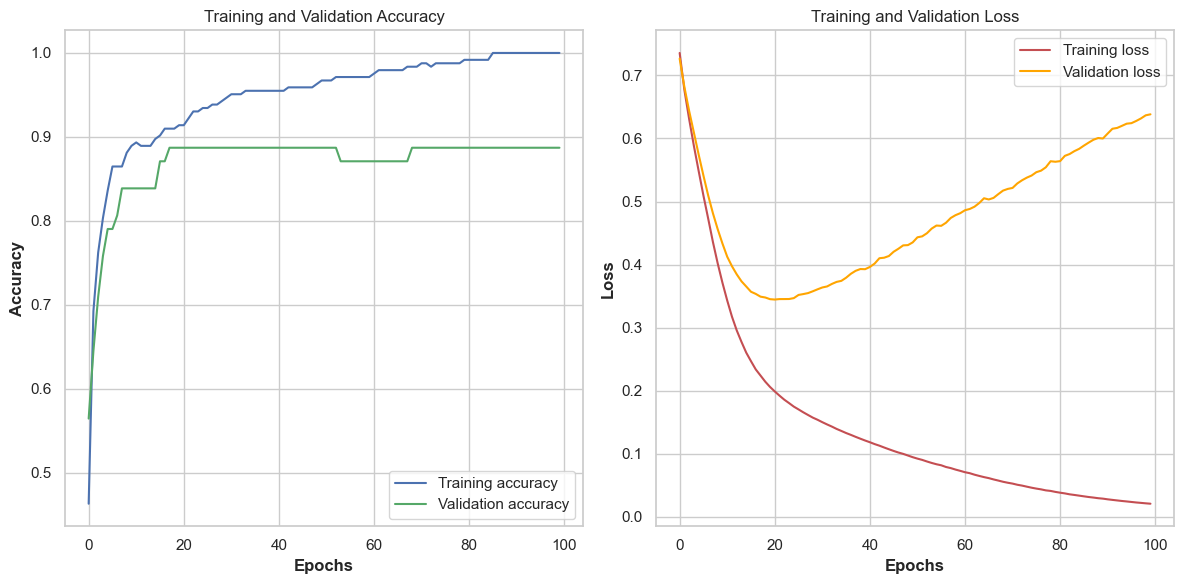

In [109]:
def plot_history(history):
    # Accuracy graph
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy', color='b')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy', color='g')
    plt.xlabel('Epochs', fontweight="bold")
    plt.ylabel('Accuracy', fontweight="bold")
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid(True)

    # Loss graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss', color='r')
    plt.plot(history.history['val_loss'], label='Validation loss', color='orange')
    plt.xlabel('Epochs', fontweight="bold")
    plt.ylabel('Loss', fontweight="bold")
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the graphs
plot_history(history)

In [110]:
# Evaluate the model
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9467 - loss: 0.2186
Test accuracy: 0.948051929473877


In [111]:
# Make predictions with the neural network model
predictions_ANN = nn_model.predict(X_test)

# Converting predictions to 0 or 1 (as your output is sigmoid)
predictions_ANN = (predictions_ANN > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_ANN)
print(f'Accuracy of Neural Network: {accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Accuracy of Neural Network: 0.948051948051948


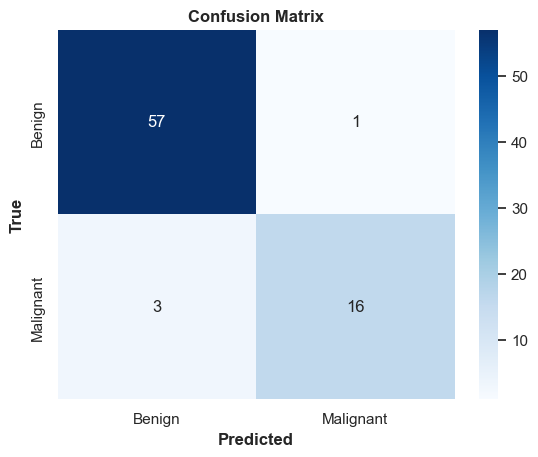

In [112]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions_ANN)

# Display the confusion matrix using seaborn with labels 'Benign' and 'Malignant'
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted', fontweight="bold")
plt.ylabel('True', fontweight="bold")
plt.title('Confusion Matrix', fontweight="bold", fontsize=12)
plt.show()

# 13. Result Models

In [116]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Avaliar o modelo
nn_predictions_train = (nn_model.predict(X_train) > 0.5).astype(int)
nn_predictions_test = (nn_model.predict(X_test) > 0.5).astype(int)
nn_train_accuracy = accuracy_score(y_train, nn_predictions_train)
nn_test_accuracy = accuracy_score(y_test, nn_predictions_test)
nn_report = classification_report(y_test, nn_predictions_test, output_dict=True)

# Extract metrics of interest from the report
nn_metrics = {
    "Model": "NeuralNetwork",
    "Accuracy": nn_test_accuracy,
    "Precision": nn_report['weighted avg']['precision'],
    "Recall": nn_report['weighted avg']['recall'],
    "F1-score": nn_report['weighted avg']['f1-score'],
    "Support": nn_report['weighted avg']['support']
}

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier()
]

# List to store metrics for each model
metricas = []

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    
    # Extract metrics of interest from the report
    metrics = {
        "Model": type(model).__name__,
        "Accuracy": test_accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-score": report['weighted avg']['f1-score'],
        "Support": report['weighted avg']['support']
    }
    metricas.append(metrics)

# Add neural network metrics to the list
metricas.append(nn_metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function
df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Display the styled DataFrame with metrics
df_metricas_styled

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[LightGBM] [Info] Number of positive: 89, number of negative: 217
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 306, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290850 -> initscore=-0.891261
[LightGBM] [Info] Start training from score -0.891261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Model,Accuracy,Precision,Recall,F1-score,Support
0,GaussianNB,0.883117,0.898818,0.883117,0.869188,77.000000
1,DecisionTreeClassifier,0.922078,0.926098,0.922078,0.923342,77.000000
2,KNeighborsClassifier,0.896104,0.898633,0.896104,0.888918,77.000000
3,RandomForestClassifier,0.974026,0.974026,0.974026,0.974026,77.000000
4,LogisticRegression,0.935065,0.935185,0.935065,0.933101,77.000000
5,AdaBoostClassifier,0.961039,0.962110,0.961039,0.961369,77.000000
6,XGBClassifier,0.961039,0.962110,0.961039,0.961369,77.000000
7,LGBMClassifier,0.974026,0.974026,0.974026,0.974026,77.000000
8,NeuralNetwork,0.948052,0.947823,0.948052,0.947049,77.000000


In [121]:
# Sample new patient data
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier

# Load your trained model (assuming it's already trained)
# model = LGBMClassifier()
# model.fit(X_train, y_train)  # If you haven't trained the model yet

# ✅ Step 1: Ensure you use the same features as the model was trained on
selected_features = ['feature1', 'feature2', 'feature3', 'feature4',  # Replace with actual feature names
                     'feature5', 'feature6', 'feature7', 'feature8',
                     'feature9', 'feature10', 'feature11', 'feature12',
                     'feature13', 'feature14', 'feature15', 'feature16']

# ✅ Step 2: New patient data with the correct number of features
new_patient_data = [[5.1, 3.5, 1.4, 0.2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]  # Adjust values accordingly

# ✅ Step 3: Convert the new data into a DataFrame and match feature names
new_patient_df = pd.DataFrame(new_patient_data, columns=selected_features)

# ✅ Step 4: Convert to NumPy array
new_patient_array = new_patient_df.values

# ✅ Step 5: Make predictions
prediction = model.predict(new_patient_array)
probability = model.predict_proba(new_patient_array)

# ✅ Step 6: Display results
print("New Patient Data:", new_patient_array)
print("Predicted Class:", "Malignant" if prediction[0] == 1 else "Benign")
print("Prediction Probability:", probability)

New Patient Data: [[ 5.1  3.5  1.4  0.2  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.
  10.  11. ]]
Predicted Class: Malignant
Prediction Probability: [[0.00429788 0.99570212]]
